In [1]:
# so we can use packages from parent directory
import sys
sys.path.append("..")

In [2]:
from monroe_data import MonroeData, MonroeDataEntry, Color

In [26]:
import matplotlib.pyplot as plt


In [103]:
import numpy as np

In [27]:
%matplotlib inline

In [3]:
train_data = MonroeData("../data/csv/train_corpus_monroe.csv", entries_filename="../data/entries/train_entries_monroe.pkl")

In [12]:
train_data.data.head().T

,0,1,2,3,4
gameid,1124-1,1124-1,1124-1,1124-1,1124-1
clkTime,1.45988e+12,1.45988e+12,1.45988e+12,1.45988e+12,1.45988e+12
roundNum,1,2,3,4,5
condition,close,far,close,split,far
clickStatus,distr2,target,distr2,distr1,target
clickColH,248,249,291,85,156
clickColS,92,25,59,21,84
clickColL,50,50,50,50,50
clickLocS,3,1,3,2,1
clickLocL,1,2,3,1,3


In [7]:
sum(train_data.data.numOutcome)

13883.0

In [8]:
train_data.data.shape

(15665, 36)

In [9]:
13883.0/15665

0.8862432173635493

So, 88% of the time humans get it right.

In [14]:
close = train_data.data[train_data.data["condition"] == "close"]

In [19]:
sum(close.numOutcome)/close.shape[0]

0.8088776894747044

In [20]:
far = train_data.data[train_data.data["condition"] == "far"]

In [21]:
sum(far.numOutcome)/far.shape[0]

0.9637226970560304

In [22]:
split = train_data.data[train_data.data["condition"] == "split"]

In [23]:
sum(split.numOutcome)/split.shape[0]

0.8845640145010494

In [25]:
far[far.numOutcome == 0]

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
196,6719-f,1.459878e+12,49,far,distr2,216,56,50,3,1,...,1.459878e+12,speaker,DARK YOU IDIOT. This one is orange,964.0,0.0,7,27,18.0,4.0,human
212,7131-3,1.459879e+12,15,far,distr2,41,60,50,1,2,...,1.459879e+12,speaker,ugly tan,967.0,0.0,2,7,7.0,2.0,human
232,7131-3,1.459879e+12,35,far,distr1,45,55,50,2,3,...,1.459879e+12,speaker,orange,967.0,0.0,1,6,6.0,1.0,human
295,3843-c,1.459880e+12,48,far,distr1,265,80,50,2,3,...,1.459880e+12,speaker,Not Green or Blue,385.0,0.0,4,14,9.0,2.0,human
344,7555-2,1.459880e+12,47,far,distr1,349,1,50,2,1,...,1.459880e+12,speaker,green,273.0,0.0,1,5,5.0,1.0,human
383,3540-a,1.459880e+12,36,far,distr2,97,15,50,1,1,...,1.459880e+12,speaker,green,73.0,0.0,1,5,5.0,1.0,human
388,3540-a,1.459881e+12,41,far,distr2,21,47,50,2,1,...,1.459881e+12,speaker,brown,73.0,0.0,1,5,5.0,1.0,human
466,0881-5,1.459881e+12,19,far,distr2,17,43,50,3,3,...,1.459881e+12,speaker,brown,27.0,0.0,1,5,5.0,1.0,human
629,4793-5,1.459883e+12,32,far,distr1,72,11,50,1,2,...,1.459883e+12,speaker,pink,138.0,0.0,1,4,4.0,1.0,human
823,7850-e,1.459883e+12,28,far,distr2,45,99,50,2,2,...,1.459883e+12,speaker,blue,131.0,0.0,1,4,4.0,1.0,human


In [37]:
split[split.numOutcome == 0]

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
3,1124-1,1.459877e+12,4,split,distr1,85,21,50,2,1,...,1.459877e+12,speaker,lime,201.0,0.0,1,4,4.0,1.0,human
31,1124-1,1.459878e+12,32,split,distr1,93,14,50,3,3,...,1.459878e+12,speaker,green,201.0,0.0,1,5,5.0,1.0,human
120,2007-2,1.459878e+12,23,split,distr1,146,12,50,3,3,...,1.459878e+12,speaker,blue gray,963.0,0.0,2,8,8.0,2.0,human
126,2007-2,1.459878e+12,29,split,distr1,232,5,50,1,2,...,1.459878e+12,speaker,the darker gray,963.0,0.0,3,13,10.0,2.0,human
160,6719-f,1.459877e+12,13,split,distr1,297,31,50,2,1,...,1.459877e+12,speaker,darkest color,964.0,0.0,2,12,12.0,2.0,human
189,6719-f,1.459878e+12,42,split,distr1,312,64,50,1,3,...,1.459878e+12,speaker,dark puprle,964.0,0.0,2,10,10.0,2.0,human
200,7131-3,1.459879e+12,3,split,distr1,104,19,50,3,3,...,1.459879e+12,speaker,lime green,967.0,0.0,2,9,9.0,2.0,human
218,7131-3,1.459879e+12,21,split,distr1,271,22,50,3,1,...,1.459879e+12,speaker,dark purple,967.0,0.0,2,10,10.0,2.0,human
223,7131-3,1.459879e+12,26,split,distr1,209,5,50,3,3,...,1.459879e+12,speaker,grey,967.0,0.0,1,4,4.0,1.0,human
238,7131-3,1.459880e+12,41,split,distr1,65,45,50,2,3,...,1.459880e+12,speaker,brownish yellow,967.0,0.0,2,14,14.0,2.0,human


14839) Game: 2918-7 Round: 20
blue ~ dark


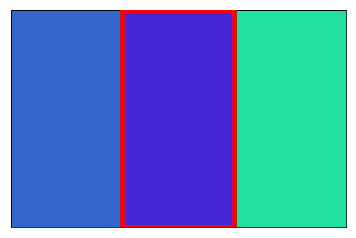

In [47]:
train_data.display_game(14839)

In [41]:
full_data = MonroeData("../data/csv/filteredCorpus.csv", single_speaker=False)

In [49]:
%%time
for _ in full_data.read_data(): pass

CPU times: user 4min 15s, sys: 1.89 s, total: 4min 17s
Wall time: 4min 17s


18101) Game: 2918-7 Round: 20
blue


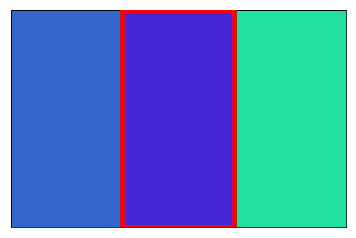

18102) Game: 2918-7 Round: 20
light or dark blue?


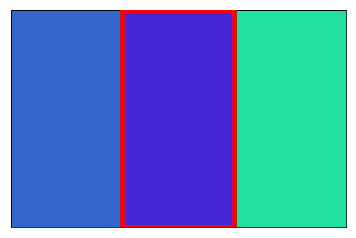

18103) Game: 2918-7 Round: 20
dark


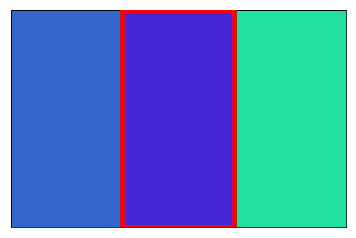

In [50]:
full_data.display_game_for_gameid("2918-7", round_num=20)

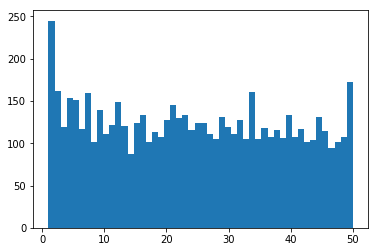

In [136]:
plt.hist(full_data.data[full_data.data.numOutcome == 0].roundNum, 50)
plt.show()

In [59]:
failures = full_data.data[full_data.data.numOutcome == 0]

In [71]:
failures.T

,0,2,3,4,25,37,39,40,47,129,...,57850,57851,57854,57859,57860,57871,57904,57910,57922,57945
gameid,1124-1,1124-1,1124-1,1124-1,1124-1,1124-1,1124-1,1124-1,1124-1,2007-2,...,8762-f,8762-f,8762-f,8762-f,8762-f,8762-f,8452-5,8452-5,8452-5,8452-5
clkTime,1.45988e+12,1.45988e+12,1.45988e+12,1.45988e+12,1.45988e+12,1.45988e+12,1.45988e+12,1.45988e+12,1.45988e+12,1.45988e+12,...,1.47701e+12,1.47701e+12,1.47701e+12,1.47701e+12,1.47701e+12,1.47701e+12,1.477e+12,1.477e+12,1.477e+12,1.47701e+12
roundNum,1,3,3,4,21,32,34,34,42,20,...,21,21,24,29,29,38,9,15,27,50
condition,close,close,close,split,close,split,close,close,close,close,...,close,close,split,far,far,close,split,split,close,split
clickStatus,distr2,distr2,distr2,distr1,distr2,distr1,distr2,distr2,distr2,distr2,...,distr2,distr2,distr1,distr1,distr1,distr1,distr2,distr1,distr2,distr1
clickColH,248,291,291,85,315,93,263,263,178,84,...,284,284,41,295,295,320,304,90,292,74
clickColS,92,59,59,21,71,14,39,39,31,13,...,18,18,5,91,91,53,55,47,43,90
clickColL,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
clickLocS,3,3,3,2,3,3,3,3,1,1,...,1,1,2,3,3,3,1,3,3,1
clickLocL,1,3,3,1,1,3,3,3,1,2,...,1,1,2,1,1,3,2,1,1,2


In [68]:
successes = full_data.data[full_data.data.numOutcome == 1]

Message length is not a great indicator - most are 1

(array([3.907e+03, 3.760e+02, 2.370e+02, 9.800e+01, 3.600e+01, 2.100e+01,
        7.000e+00, 7.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 12 Patch objects>)

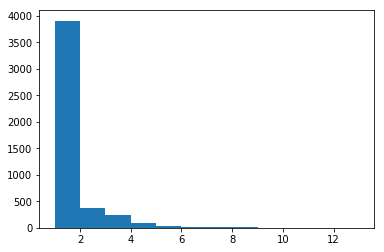

In [67]:
plt.hist(failures.groupby(["gameid", "roundNum"]).size(), bins=list(range(1, 14)))

(array([3.7089e+04, 2.8030e+03, 1.5630e+03, 5.0900e+02, 1.9900e+02,
        1.0000e+02, 4.0000e+01, 1.8000e+01, 1.2000e+01, 5.0000e+00,
        1.0000e+00, 5.0000e+00]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 12 Patch objects>)

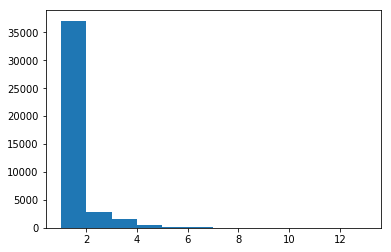

In [70]:
plt.hist(successes.groupby(["gameid", "roundNum"]).size(), bins=list(range(1, 14)))

In [52]:
full_data.data.shape

(57946, 36)

In [53]:
6229/57946

0.1074966347979153

In [74]:
failures.clkTime[1]

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
0,1124-1,1.459877e+12,1,close,distr2,248,92,50,3,1,...,1.459877e+12,speaker,The darker blue one,201.0,0.0,4,16,13.0,3.0,human
2,1124-1,1.459877e+12,3,close,distr2,291,59,50,3,3,...,1.459877e+12,speaker,Medium pink,201.0,0.0,2,10,10.0,2.0,human
3,1124-1,1.459877e+12,3,close,distr2,291,59,50,3,3,...,1.459877e+12,speaker,the medium dark one,201.0,0.0,4,16,13.0,3.0,human
4,1124-1,1.459877e+12,4,split,distr1,85,21,50,2,1,...,1.459877e+12,speaker,lime,201.0,0.0,1,4,4.0,1.0,human
25,1124-1,1.459877e+12,21,close,distr2,315,71,50,3,1,...,1.459877e+12,speaker,Neon pink,201.0,0.0,2,8,8.0,2.0,human
37,1124-1,1.459878e+12,32,split,distr1,93,14,50,3,3,...,1.459878e+12,speaker,green,201.0,0.0,1,5,5.0,1.0,human
39,1124-1,1.459878e+12,34,close,distr2,263,39,50,3,3,...,1.459878e+12,listener,I like the weirder one,483.0,0.0,5,18,14.0,3.0,human
40,1124-1,1.459878e+12,34,close,distr2,263,39,50,3,3,...,1.459878e+12,speaker,Hahaha. Me too. This one is purple. Not neon a...,201.0,0.0,12,47,27.0,5.0,human
47,1124-1,1.459878e+12,42,close,distr2,178,31,50,1,1,...,1.459878e+12,speaker,lightest shade of teal/blue/green,201.0,0.0,4,28,26.0,5.0,human
129,2007-2,1.459878e+12,20,close,distr2,84,13,50,1,2,...,1.459878e+12,speaker,the darker gray,963.0,0.0,3,13,10.0,2.0,human


(array([4.713e+03, 8.950e+02, 2.960e+02, 1.550e+02, 8.200e+01, 3.200e+01,
        2.400e+01, 1.100e+01, 5.000e+00, 5.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([ -2976.  ,   9786.15,  22548.3 ,  35310.45,  48072.6 ,  60834.75,
         73596.9 ,  86359.05,  99121.2 , 111883.35, 124645.5 , 137407.65,
        150169.8 , 162931.95, 175694.1 , 188456.25, 201218.4 , 213980.55,
        226742.7 , 239504.85, 252267.  ]),
 <a list of 20 Patch objects>)

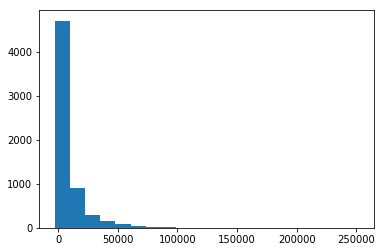

In [83]:
plt.hist(failures.clkTime - failures.msgTime, bins=20)

(array([4.5597e+04, 4.0520e+03, 1.2340e+03, 4.3500e+02, 2.1100e+02,
        9.6000e+01, 4.2000e+01, 1.8000e+01, 1.1000e+01, 7.0000e+00,
        4.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([ -2982. ,  11577.9,  26137.8,  40697.7,  55257.6,  69817.5,
         84377.4,  98937.3, 113497.2, 128057.1, 142617. , 157176.9,
        171736.8, 186296.7, 200856.6, 215416.5, 229976.4, 244536.3,
        259096.2, 273656.1, 288216. ]),
 <a list of 20 Patch objects>)

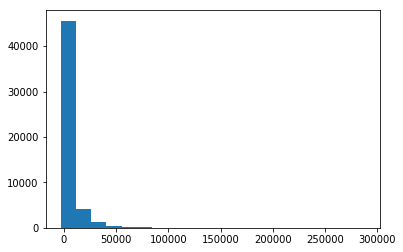

In [86]:
plt.hist(successes.clkTime - successes.msgTime, 20)

In [89]:
failure_train = train_data.data[train_data.data.numOutcome == 0]

In [90]:
success_train = train_data.data[train_data.data.numOutcome == 1]

In [110]:
bins = np.linspace(0, 20000, 100)

(array([ 207., 4845., 3451., 1843., 1103.,  654.,  412.,  303.,  204.,
         162.,  106.,   73.,   86.,   53.,   47.,   38.,   35.,   26.,
          18.]),
 array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
         9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
        18000, 19000]),
 <a list of 19 Patch objects>)

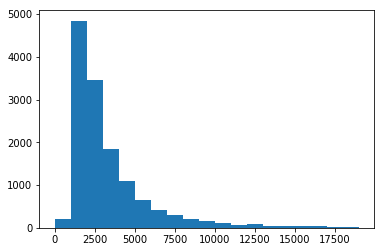

In [99]:
plt.hist(success_train.clkTime - success_train.msgTime, bins = list(range(0, 20000, 1000)))

It looks like there's some signal in the message time, but it's pretty noisy

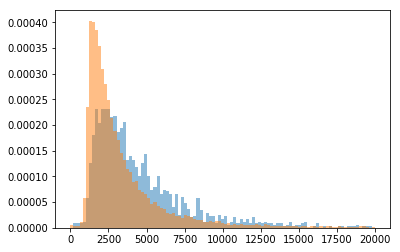

In [111]:
plt.hist(failure_train.clkTime - failure_train.msgTime, alpha=0.5, bins=bins, density=True)
plt.hist(success_train.clkTime - success_train.msgTime, alpha=0.5, bins=bins, density=True)
plt.show()

In [120]:
failure_train_wc = failure_train.contents.apply(lambda x: len(x.split()))
success_train_wc = success_train.contents.apply(lambda x: len(x.split()))

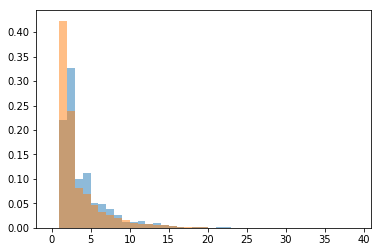

In [122]:
plt.hist(failure_train_wc, bins=list(range(40)), alpha=0.5, density=True)
plt.hist(success_train_wc, bins=list(range(40)), alpha=0.5, density=True)
plt.show()

20) Game: 1124-1 Round: 21
Neon pink


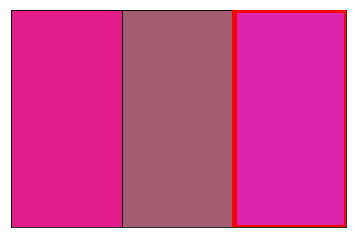

In [134]:
train_data.display_game(20)

In [124]:
from scipy.spatial import distance

In [127]:
[c.rgb for c in full_data[25].colors]

[[228, 28, 141], [164, 92, 112], [219, 37, 173]]

In [137]:
target_colors = [de.colors[0].rgb for de in train_data]

In [138]:
target_colors

[[24, 73, 232],
 [106, 96, 160],
 [201, 55, 199],
 [136, 212, 44],
 [20, 236, 150],
 [137, 131, 119],
 [131, 140, 116],
 [116, 148, 108],
 [186, 80, 70],
 [111, 125, 145],
 [88, 103, 168],
 [63, 204, 52],
 [137, 147, 109],
 [150, 106, 142],
 [72, 130, 184],
 [6, 128, 250],
 [189, 169, 67],
 [119, 138, 118],
 [107, 155, 101],
 [128, 127, 129],
 [228, 28, 141],
 [128, 131, 125],
 [150, 124, 106],
 [78, 178, 78],
 [129, 133, 123],
 [183, 73, 124],
 [241, 15, 53],
 [182, 72, 184],
 [218, 80, 38],
 [120, 205, 51],
 [136, 120, 126],
 [63, 193, 154],
 [177, 154, 79],
 [150, 95, 161],
 [246, 34, 10],
 [149, 218, 38],
 [84, 128, 172],
 [141, 124, 115],
 [164, 124, 92],
 [57, 55, 201],
 [74, 182, 166],
 [41, 23, 233],
 [97, 159, 137],
 [118, 137, 138],
 [115, 141, 135],
 [236, 85, 20],
 [67, 189, 126],
 [97, 159, 98],
 [199, 207, 49],
 [92, 200, 56],
 [89, 173, 83],
 [206, 71, 50],
 [132, 131, 124],
 [170, 115, 86],
 [90, 105, 166],
 [128, 128, 128],
 [20, 236, 178],
 [170, 158, 86],
 [128, 197,

In [139]:
from scipy.cluster.vq import kmeans, whiten

In [142]:
whitened_targets = whiten(target_colors)

In [144]:
means = kmeans(whitened_targets, 20)

In [163]:
# go from whitened_target -> closest mean
x = [np.argmin(np.linalg.norm(target - mean) for mean in means[0]) for target in whitened_targets]

In [164]:
sum(x)

0

In [159]:
np.argmin([np.linalg.norm(whitened_targets[0] - mean) for mean in means[0]])

0

In [167]:
x = [np.argmin([np.linalg.norm(target - mean) for mean in means[0]]) for target in whitened_targets]

In [169]:
x

[0,
 13,
 4,
 9,
 15,
 7,
 7,
 3,
 14,
 7,
 13,
 12,
 3,
 7,
 16,
 1,
 2,
 7,
 3,
 7,
 11,
 7,
 7,
 12,
 7,
 14,
 17,
 18,
 17,
 9,
 7,
 16,
 2,
 18,
 17,
 9,
 16,
 7,
 14,
 0,
 16,
 0,
 16,
 7,
 7,
 19,
 12,
 3,
 6,
 9,
 12,
 17,
 7,
 14,
 13,
 7,
 8,
 2,
 9,
 2,
 14,
 7,
 7,
 13,
 11,
 12,
 9,
 10,
 17,
 18,
 12,
 4,
 7,
 3,
 13,
 3,
 0,
 7,
 13,
 15,
 9,
 5,
 3,
 2,
 3,
 16,
 9,
 9,
 11,
 6,
 13,
 5,
 14,
 18,
 3,
 7,
 19,
 12,
 9,
 7,
 7,
 7,
 14,
 7,
 14,
 18,
 0,
 11,
 13,
 9,
 1,
 16,
 7,
 14,
 6,
 2,
 13,
 7,
 15,
 5,
 3,
 13,
 4,
 3,
 1,
 7,
 7,
 14,
 16,
 15,
 16,
 2,
 8,
 3,
 7,
 3,
 12,
 7,
 14,
 18,
 16,
 10,
 18,
 1,
 13,
 7,
 10,
 16,
 6,
 14,
 3,
 13,
 3,
 8,
 18,
 2,
 8,
 16,
 3,
 10,
 10,
 14,
 3,
 12,
 7,
 1,
 19,
 1,
 0,
 10,
 10,
 7,
 18,
 7,
 7,
 0,
 2,
 7,
 8,
 4,
 12,
 2,
 7,
 0,
 15,
 2,
 0,
 11,
 3,
 13,
 13,
 12,
 7,
 13,
 4,
 7,
 19,
 13,
 3,
 4,
 2,
 7,
 16,
 10,
 1,
 3,
 7,
 16,
 7,
 12,
 14,
 9,
 3,
 6,
 14,
 11,
 17,
 2,
 10,
 2,
 13,
 7,
 13,
 7,
 10,
 

(array([ 546.,  496.,  894., 1008.,  604.,  528.,  523., 2849.,  482.,
         579.,  567.,  579.,  733., 1014.,  924.,  535.,  900.,  429.,
        1475.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

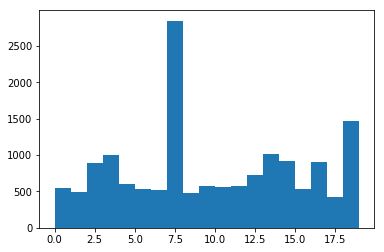

In [174]:
plt.hist(x, bins=list(range(20)))

In [182]:
clusters = [[] for i in range(20)]
for i in range(len(target_colors)):
    clusters[x[i]].append((i, target_colors[i]))

In [184]:
clusters[0]

[(0, [24, 73, 232]),
 (39, [57, 55, 201]),
 (41, [41, 23, 233]),
 (76, [46, 52, 210]),
 (106, [86, 32, 224]),
 (168, [77, 55, 201]),
 (175, [90, 14, 242]),
 (183, [51, 69, 205]),
 (186, [72, 49, 207]),
 (247, [42, 15, 241]),
 (251, [3, 11, 253]),
 (280, [52, 78, 204]),
 (296, [52, 1, 255]),
 (379, [55, 57, 201]),
 (421, [58, 65, 198]),
 (438, [75, 28, 228]),
 (459, [15, 60, 241]),
 (464, [44, 41, 215]),
 (474, [12, 50, 244]),
 (541, [10, 61, 246]),
 (555, [46, 26, 230]),
 (561, [87, 41, 215]),
 (573, [49, 65, 207]),
 (578, [35, 53, 221]),
 (625, [45, 53, 211]),
 (678, [80, 18, 238]),
 (727, [55, 70, 201]),
 (823, [9, 21, 247]),
 (825, [95, 28, 228]),
 (842, [6, 15, 250]),
 (853, [48, 19, 237]),
 (855, [47, 61, 209]),
 (879, [57, 27, 229]),
 (903, [49, 75, 207]),
 (956, [52, 33, 223]),
 (988, [49, 57, 207]),
 (999, [75, 49, 207]),
 (1051, [89, 38, 218]),
 (1117, [43, 22, 234]),
 (1119, [47, 77, 209]),
 (1189, [69, 58, 198]),
 (1193, [42, 54, 214]),
 (1251, [4, 66, 252]),
 (1265, [38, 20

In [181]:
len(clusters[0][0])

2

0) Game: 1124-1 Round: 1
The darker blue one


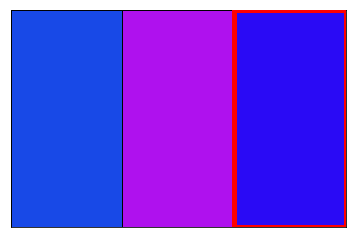

39) Game: 1124-1 Round: 41
blue


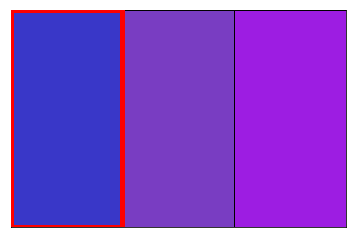

41) Game: 1124-1 Round: 43
blue


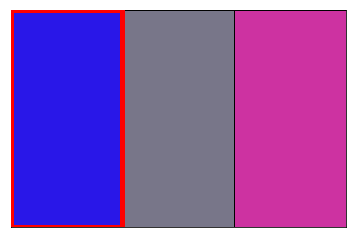

76) Game: 8235-6 Round: 29
bright blue (not one with hint of purple)


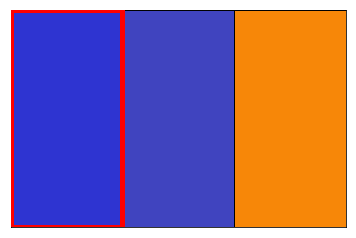

106) Game: 2007-2 Round: 9
blue


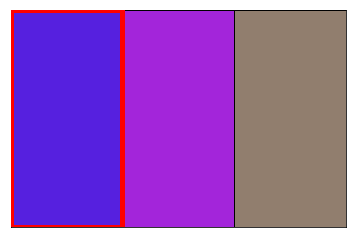

15) Game: 1124-1 Round: 16
Plain blue


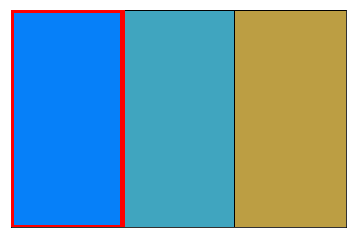

110) Game: 2007-2 Round: 13
brigher blue


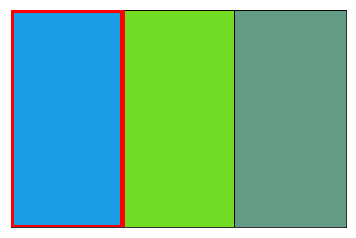

124) Game: 2007-2 Round: 27
bright blue


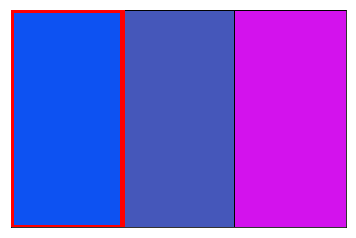

143) Game: 2007-2 Round: 46
bright blue


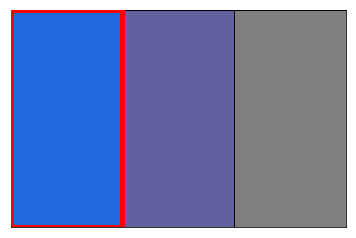

165) Game: 6719-f Round: 18
blue


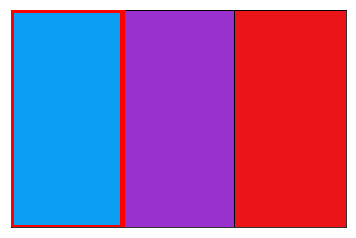

16) Game: 1124-1 Round: 17
Yellowish brownish orangish yellow ~ lol


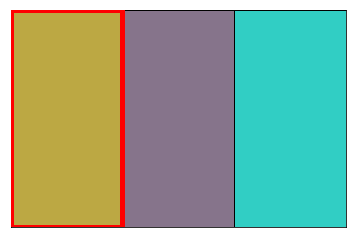

32) Game: 1124-1 Round: 33
brown. not the yellow one or classic brown one, the weirder one


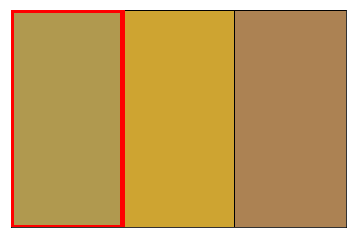

57) Game: 8235-6 Round: 9
brownish


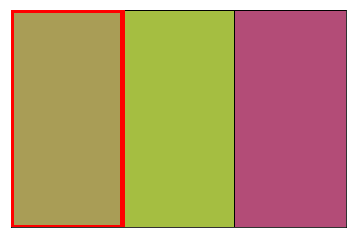

59) Game: 8235-6 Round: 12
brownish


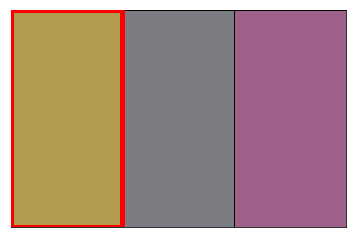

83) Game: 8235-6 Round: 36
orange


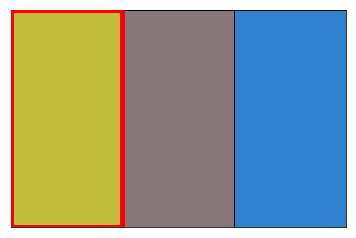

7) Game: 1124-1 Round: 8
Camo green


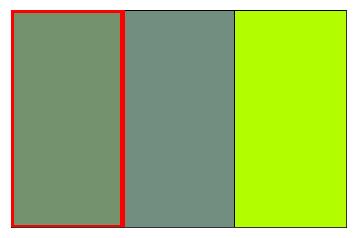

12) Game: 1124-1 Round: 13
One of the brown ones, the lighter shaded one


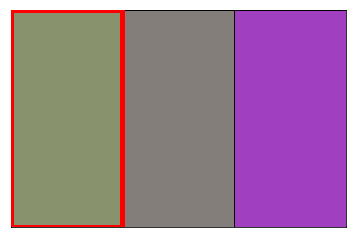

18) Game: 1124-1 Round: 19
Camo green


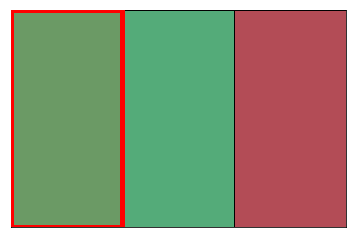

47) Game: 1124-1 Round: 49
not camo and not brown


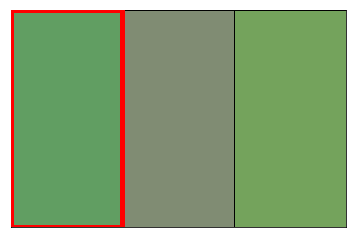

73) Game: 8235-6 Round: 26
grey-green


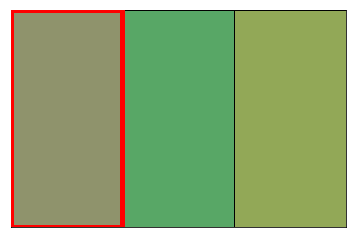

2) Game: 1124-1 Round: 3
Medium pink ~ the medium dark one


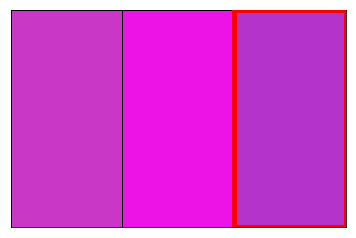

71) Game: 8235-6 Round: 24
brightest pink


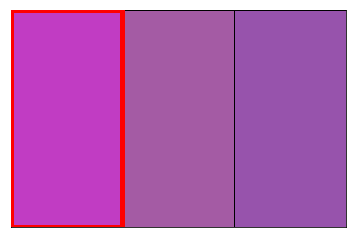

122) Game: 2007-2 Round: 25
bright pink


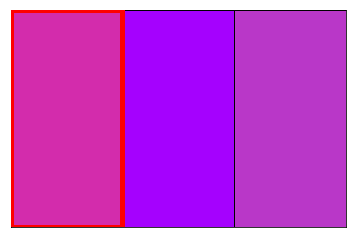

179) Game: 6719-f Round: 32
magenta


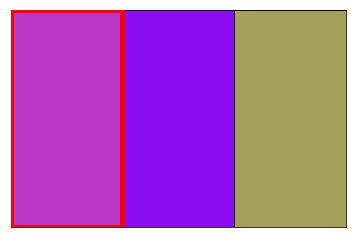

194) Game: 6719-f Round: 47
magenta


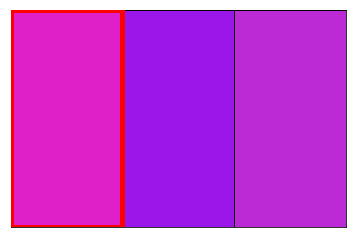

81) Game: 8235-6 Round: 34
green, but not neon green


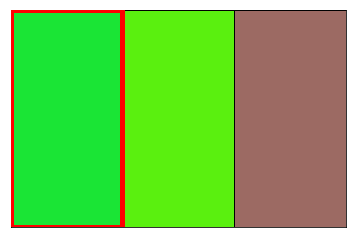

91) Game: 8235-6 Round: 44
green


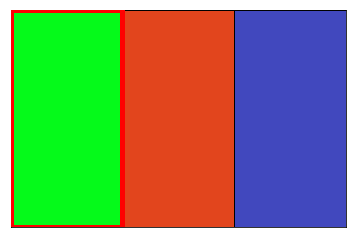

119) Game: 2007-2 Round: 22
green


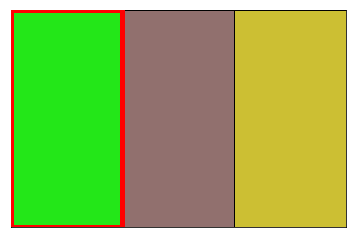

244) Game: 7131-3 Round: 47
green


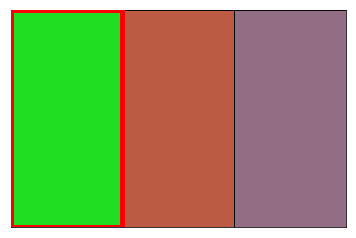

259) Game: 3843-c Round: 12
Brighter Green


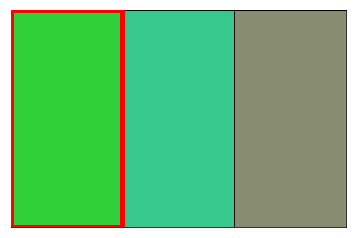

48) Game: 1124-1 Round: 50
YELLOW!!!!


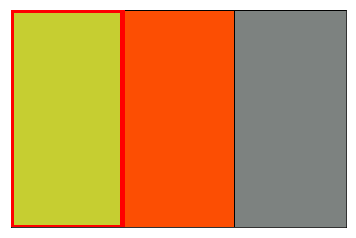

89) Game: 8235-6 Round: 42
yellow


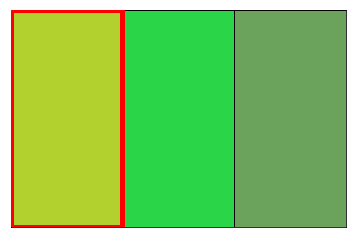

114) Game: 2007-2 Round: 17
the orangeish one


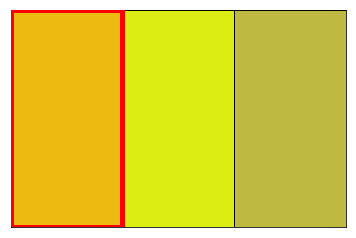

148) Game: 6719-f Round: 1
green


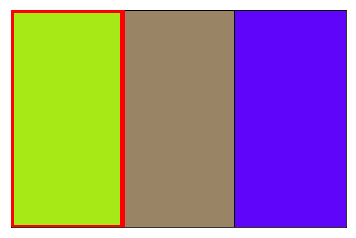

213) Game: 7131-3 Round: 16
other one ~ green


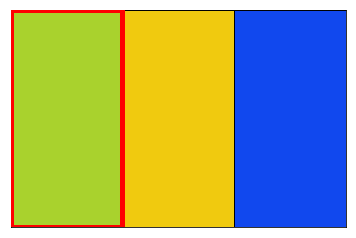

5) Game: 1124-1 Round: 6
Mud brown


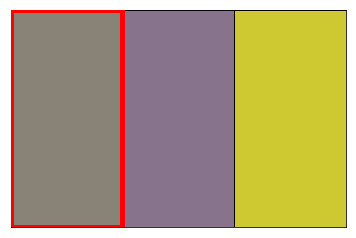

6) Game: 1124-1 Round: 7
Mud brown


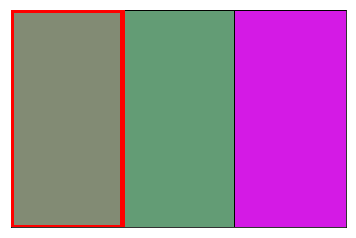

9) Game: 1124-1 Round: 10
Grey


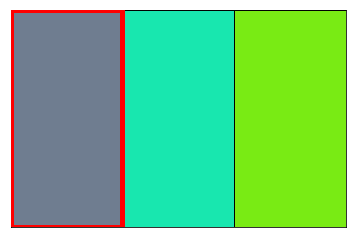

13) Game: 1124-1 Round: 14
The more vibrantly red one... not the more purple one


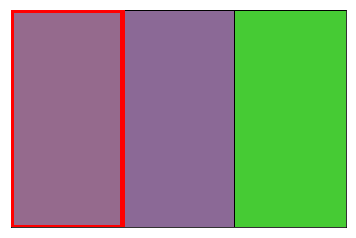

17) Game: 1124-1 Round: 18
Like that description? Haha ~ Thank you. ~ Grey


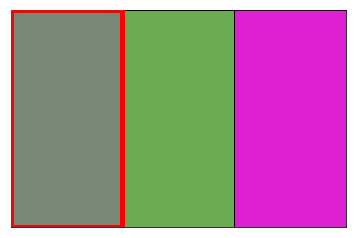

56) Game: 8235-6 Round: 8
teal (not the two that are more green)


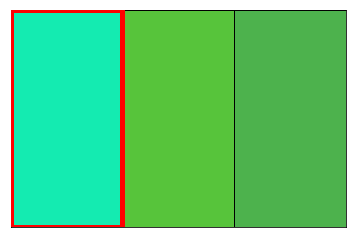

132) Game: 2007-2 Round: 35
blue


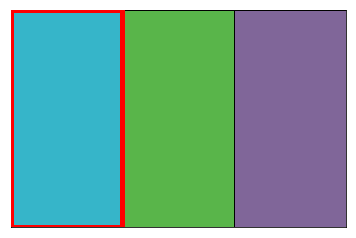

153) Game: 6719-f Round: 6
brightest teal


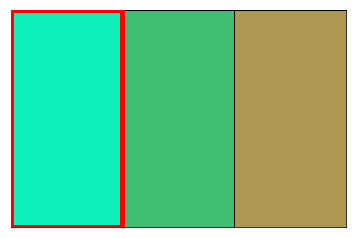

156) Game: 6719-f Round: 9
teal/blue


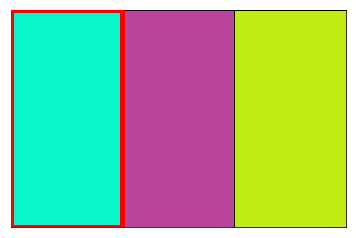

178) Game: 6719-f Round: 31
bright teal


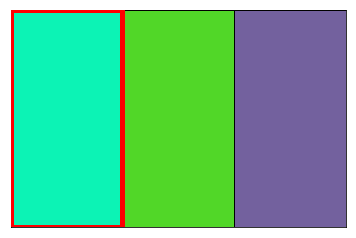

3) Game: 1124-1 Round: 4
lime


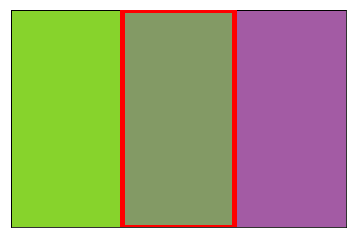

29) Game: 1124-1 Round: 30
dark green


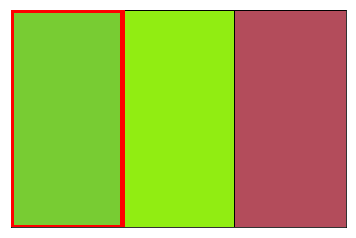

35) Game: 1124-1 Round: 36
Lime green, not forest green


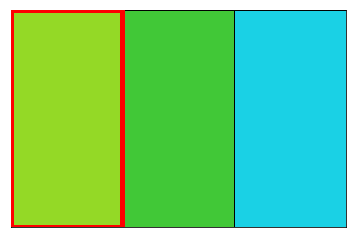

49) Game: 8235-6 Round: 1
select the bright green, not the olive


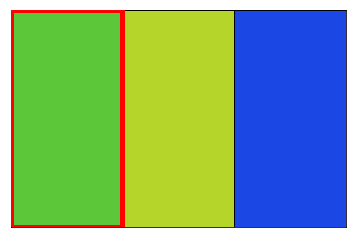

58) Game: 8235-6 Round: 11
the bright green


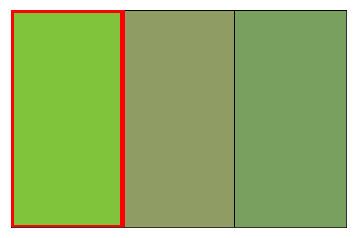

67) Game: 8235-6 Round: 20
dark purple (good job on the last two, by the way)


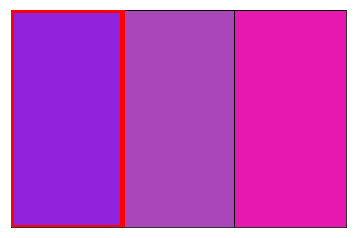

141) Game: 2007-2 Round: 44
purple


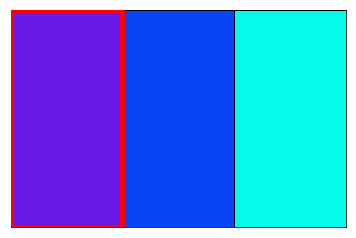

146) Game: 2007-2 Round: 49
purple


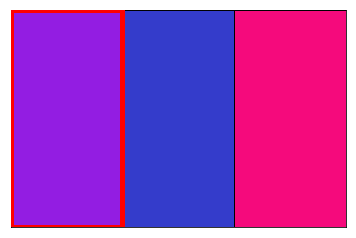

159) Game: 6719-f Round: 12
purple on the right


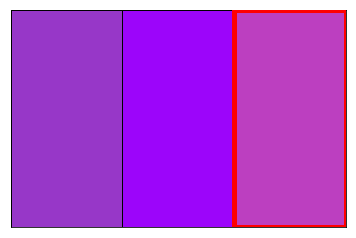

160) Game: 6719-f Round: 13
darkest color


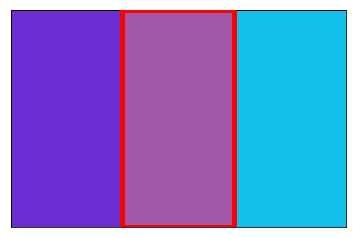

20) Game: 1124-1 Round: 21
Neon pink


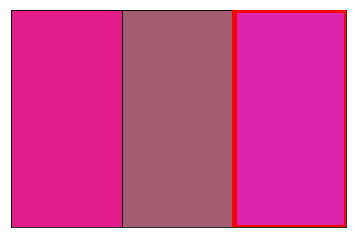

64) Game: 8235-6 Round: 17
dark pink; not bright pink


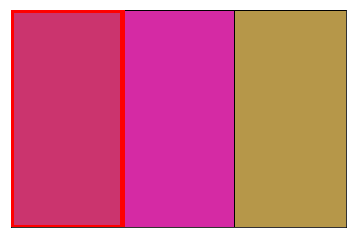

88) Game: 8235-6 Round: 41
pink


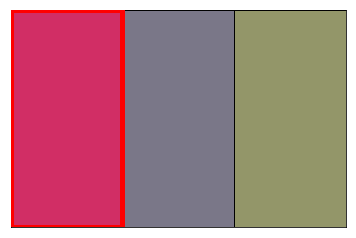

107) Game: 2007-2 Round: 10
the slightly darker pink


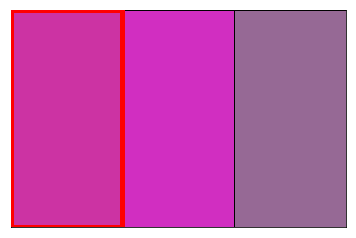

187) Game: 6719-f Round: 40
red


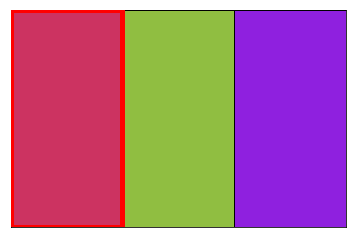

11) Game: 1124-1 Round: 12
Darkest shade of green, forest green


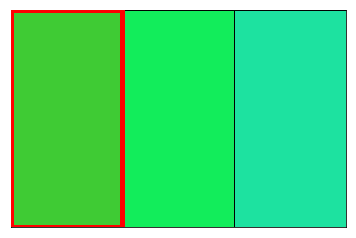

23) Game: 1124-1 Round: 24
forest green


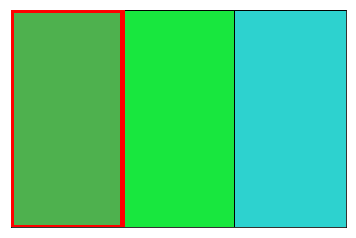

46) Game: 1124-1 Round: 48
dark green


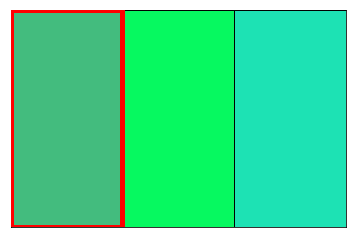

50) Game: 8235-6 Round: 2
green


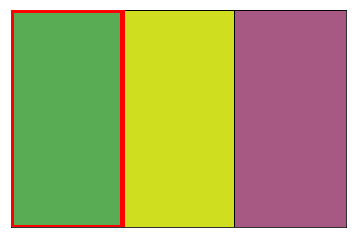

65) Game: 8235-6 Round: 18
brightest green


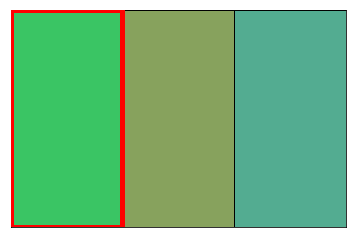

1) Game: 1124-1 Round: 2
purple


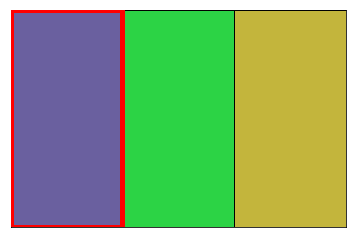

10) Game: 1124-1 Round: 11
Purple


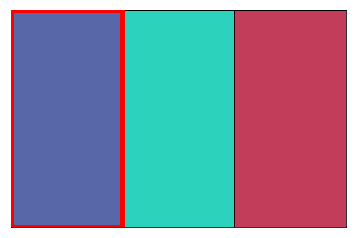

54) Game: 8235-6 Round: 6
blue


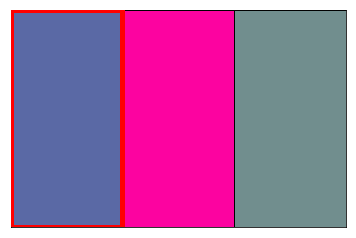

63) Game: 8235-6 Round: 16
purple


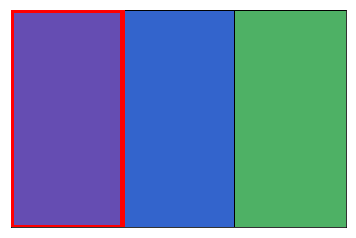

74) Game: 8235-6 Round: 27
grey-purple


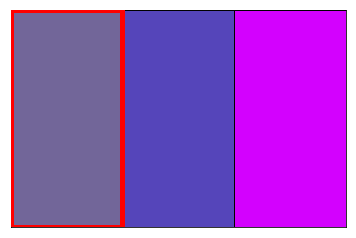

8) Game: 1124-1 Round: 9
Darkish red


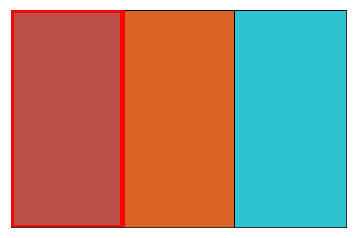

25) Game: 1124-1 Round: 26
darker red


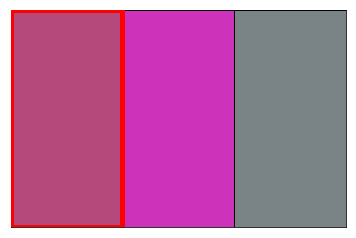

38) Game: 1124-1 Round: 40
brown


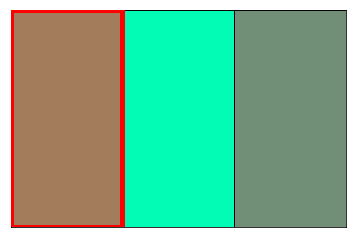

53) Game: 8235-6 Round: 5
brownish-cream; not grey or pinkish


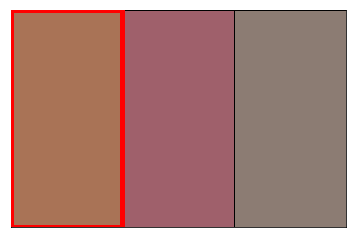

60) Game: 8235-6 Round: 13
reddish


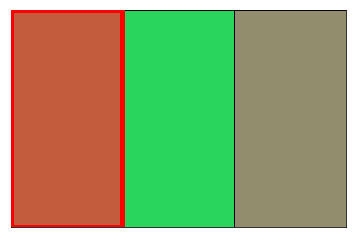

4) Game: 1124-1 Round: 5
Mint green.


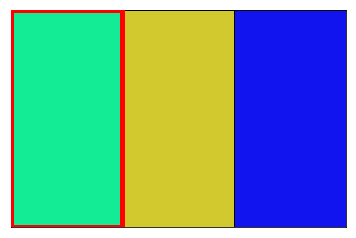

79) Game: 8235-6 Round: 32
teal


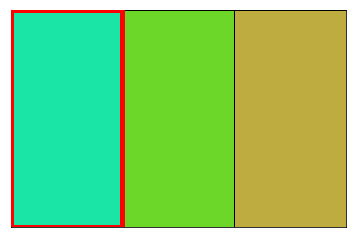

118) Game: 2007-2 Round: 21
turquoise


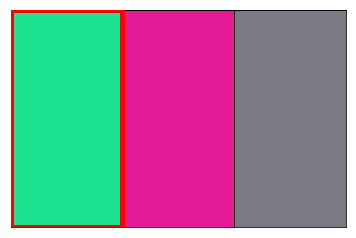

129) Game: 2007-2 Round: 32
green


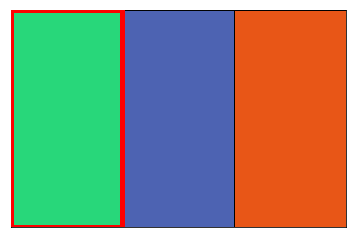

184) Game: 6719-f Round: 37
neon green


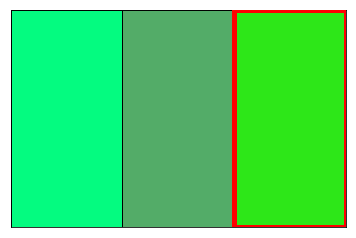

14) Game: 1124-1 Round: 15
blue


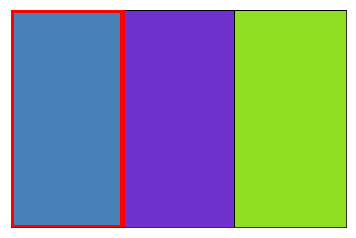

31) Game: 1124-1 Round: 32
green


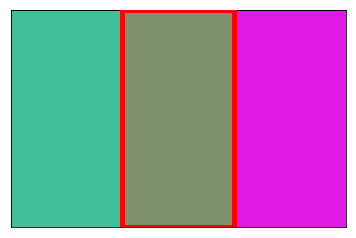

36) Game: 1124-1 Round: 37
blue


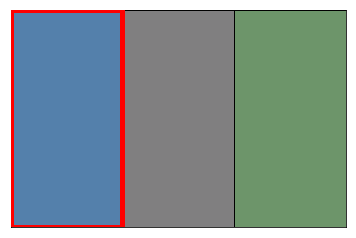

40) Game: 1124-1 Round: 42
lightest shade of teal/blue/green


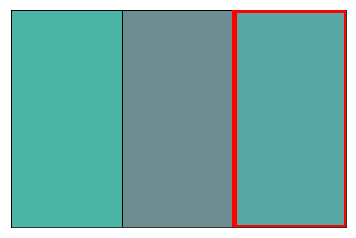

42) Game: 1124-1 Round: 44
dark yucky green


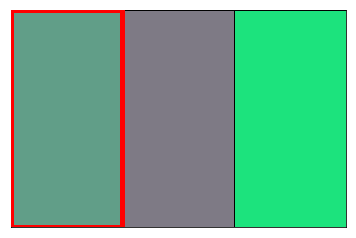

26) Game: 1124-1 Round: 27
red


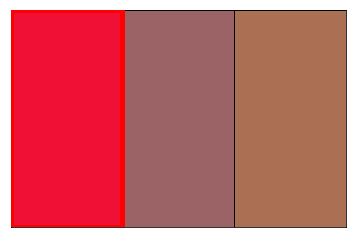

28) Game: 1124-1 Round: 29
orange


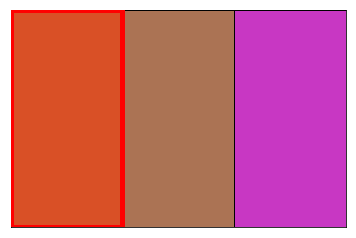

34) Game: 1124-1 Round: 35
Red


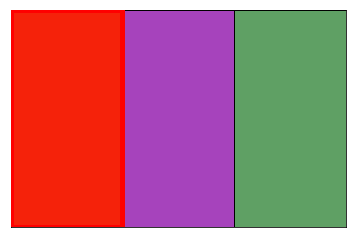

51) Game: 8235-6 Round: 3
red


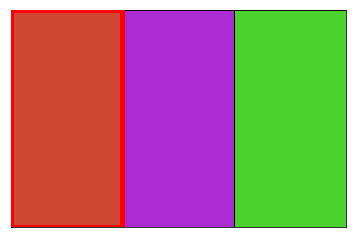

68) Game: 8235-6 Round: 21
dark orange (not the red, and not the lighter orange)


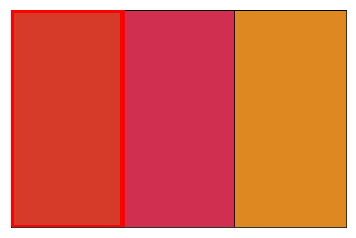

27) Game: 1124-1 Round: 28
purple, darker one


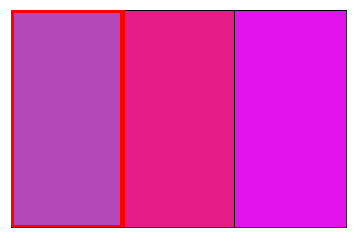

33) Game: 1124-1 Round: 34
Hahaha. Me too. This one is purple. Not neon and not lavender


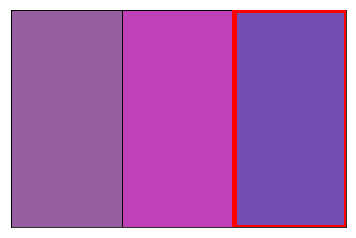

69) Game: 8235-6 Round: 22
purple; not pink or teal (good on the last one)


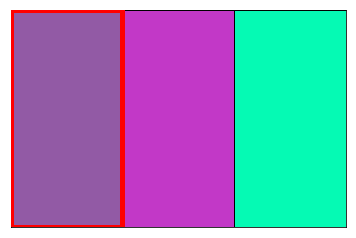

93) Game: 8235-6 Round: 46
purple


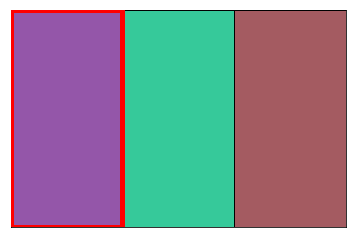

105) Game: 2007-2 Round: 8
purple


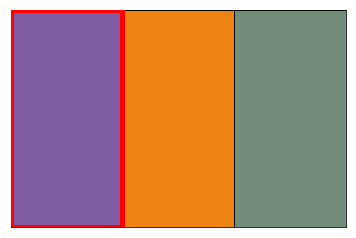

45) Game: 1124-1 Round: 47
red


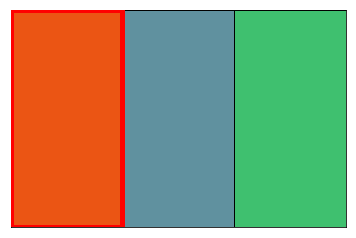

96) Game: 8235-6 Round: 49
orange


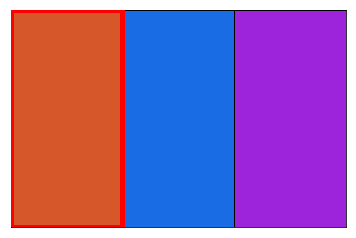

166) Game: 6719-f Round: 19
orange


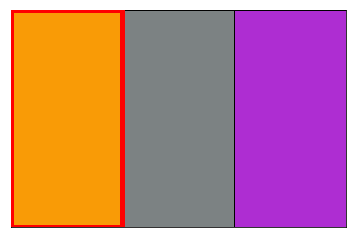

196) Game: 6719-f Round: 49
DARK YOU IDIOT. This one is orange


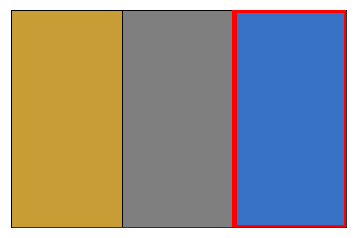

233) Game: 7131-3 Round: 36
orange


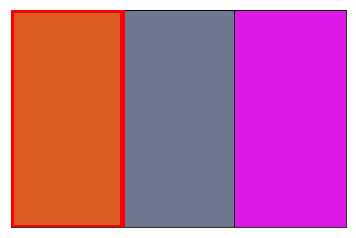

In [188]:
for c in clusters:
    for i in range(5):
        train_data.display_game(c[i][0])

148) Game: 6719-f Round: 1
green


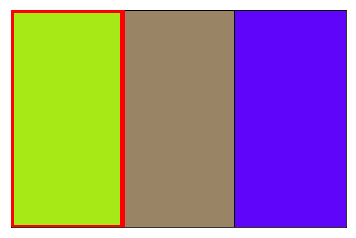

149) Game: 6719-f Round: 2
brown


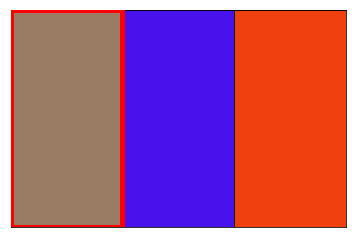

150) Game: 6719-f Round: 3
olive green, darkest


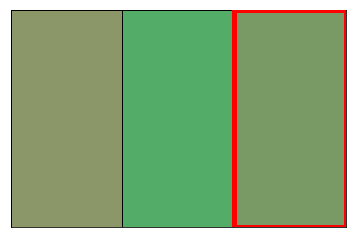

151) Game: 6719-f Round: 4
blue


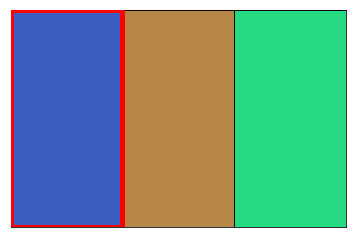

152) Game: 6719-f Round: 5
darkest shade, army colored


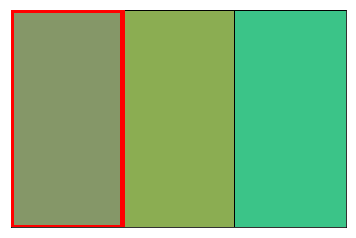

153) Game: 6719-f Round: 6
brightest teal


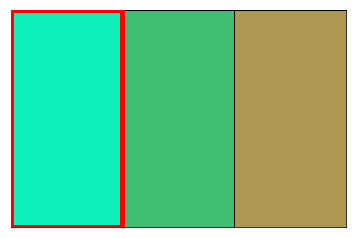

154) Game: 6719-f Round: 7
brightest purple


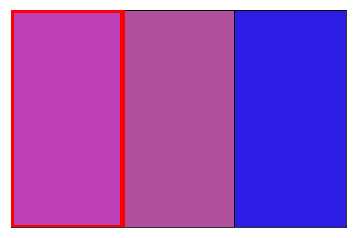

155) Game: 6719-f Round: 8
gold


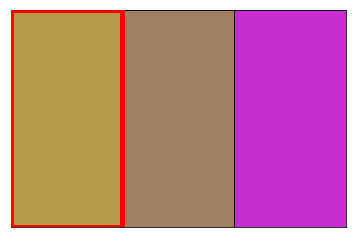

156) Game: 6719-f Round: 9
teal/blue


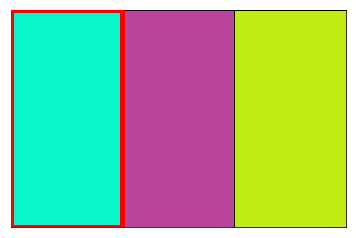

157) Game: 6719-f Round: 10
middle brightness


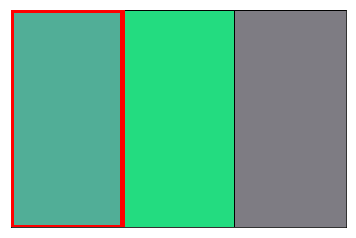

158) Game: 6719-f Round: 11
dark green


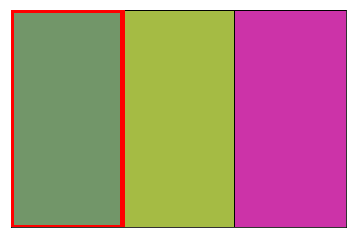

159) Game: 6719-f Round: 12
purple on the right


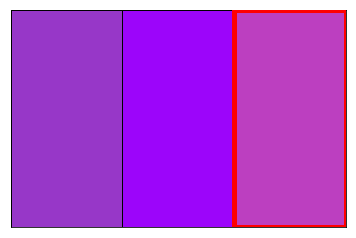

160) Game: 6719-f Round: 13
darkest color


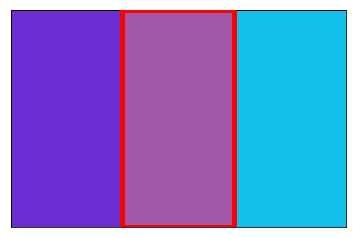

161) Game: 6719-f Round: 14
darker orange


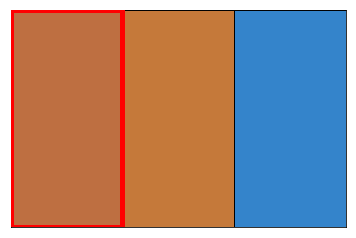

162) Game: 6719-f Round: 15
dark green


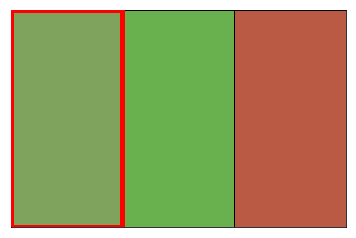

163) Game: 6719-f Round: 16
middle green


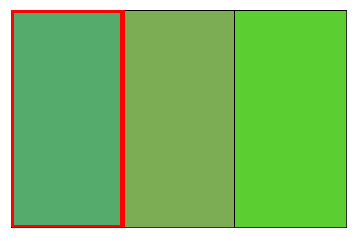

164) Game: 6719-f Round: 17
darkest color


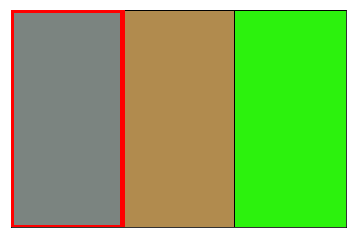

165) Game: 6719-f Round: 18
blue


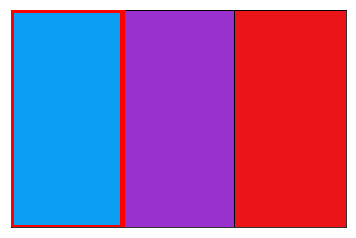

166) Game: 6719-f Round: 19
orange


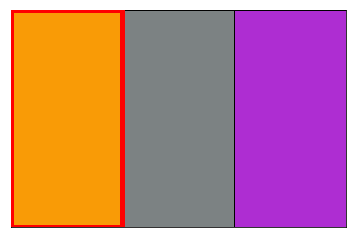

167) Game: 6719-f Round: 20
blue


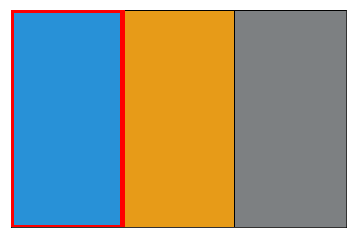

168) Game: 6719-f Round: 21
blue


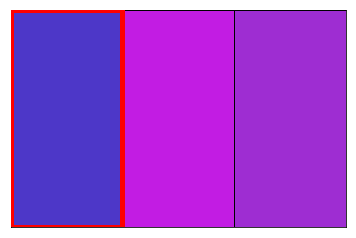

169) Game: 6719-f Round: 22
purple


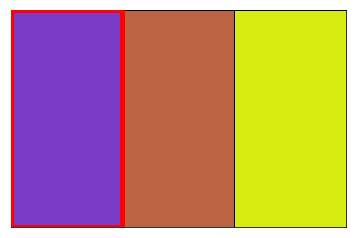

170) Game: 6719-f Round: 23
bright purple


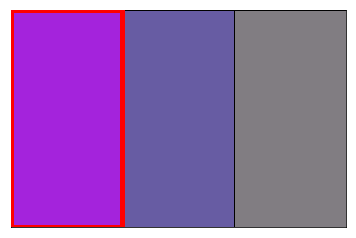

171) Game: 6719-f Round: 24
reddish


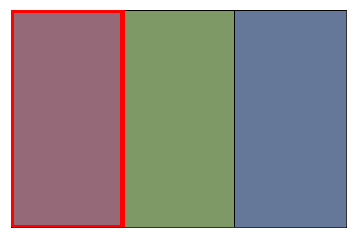

172) Game: 6719-f Round: 25
bluest purple


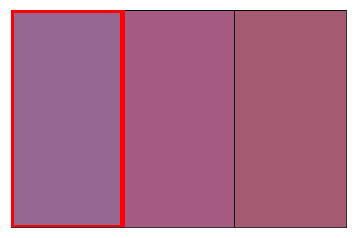

173) Game: 6719-f Round: 26
green


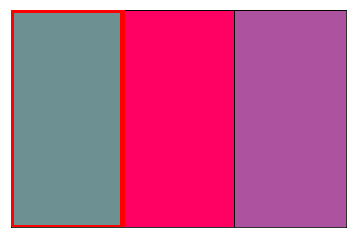

174) Game: 6719-f Round: 27
bluest green


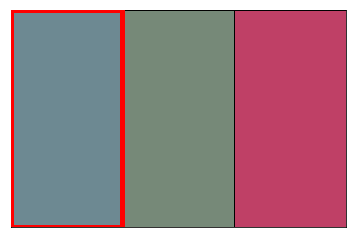

175) Game: 6719-f Round: 28
just pick a random one


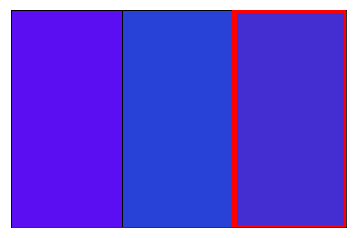

176) Game: 6719-f Round: 29
bright green


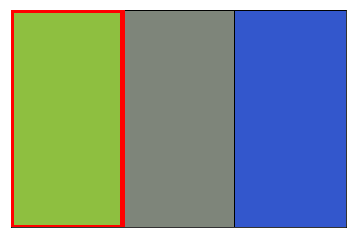

177) Game: 6719-f Round: 30
darker olive


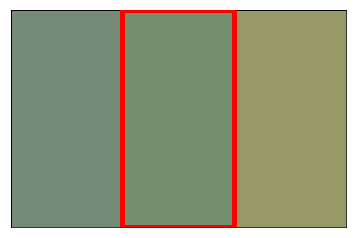

178) Game: 6719-f Round: 31
bright teal


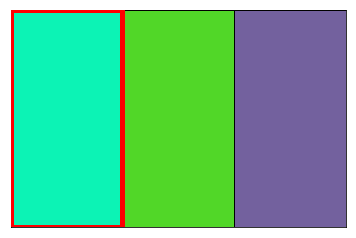

179) Game: 6719-f Round: 32
magenta


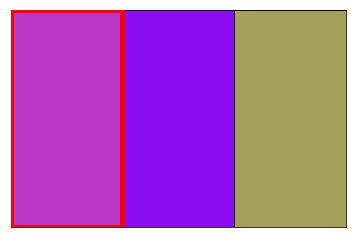

180) Game: 6719-f Round: 33
darkest green


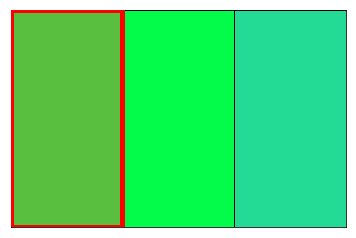

181) Game: 6719-f Round: 34
brown


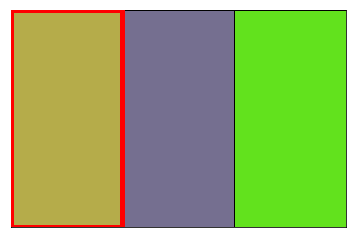

182) Game: 6719-f Round: 35
grey


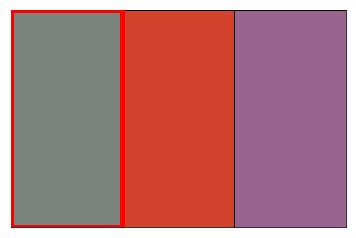

183) Game: 6719-f Round: 36
light blue


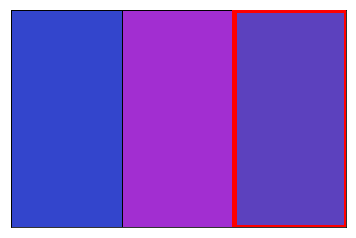

184) Game: 6719-f Round: 37
neon green


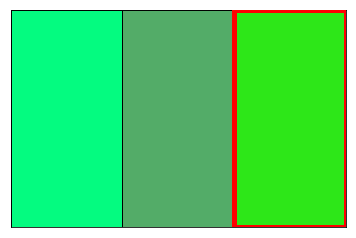

185) Game: 6719-f Round: 38
brown


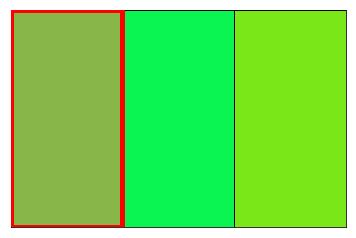

186) Game: 6719-f Round: 39
blue


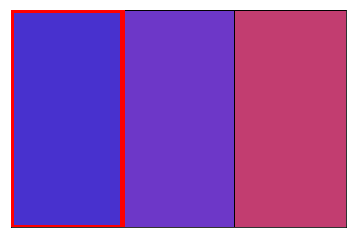

187) Game: 6719-f Round: 40
red


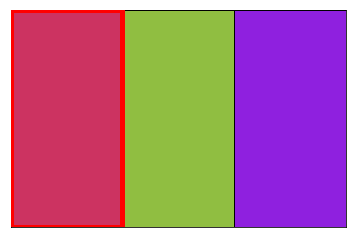

188) Game: 6719-f Round: 41
greenest


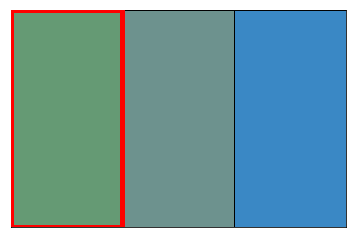

189) Game: 6719-f Round: 42
dark puprle


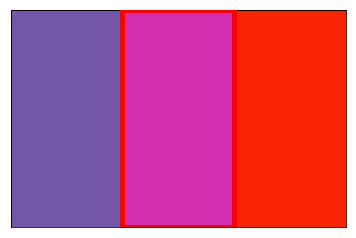

190) Game: 6719-f Round: 43
your dumb. this one is dark blue


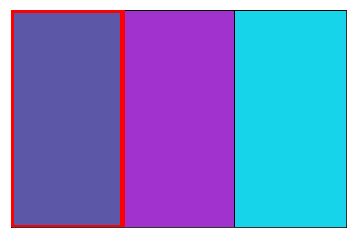

191) Game: 6719-f Round: 44
middle green


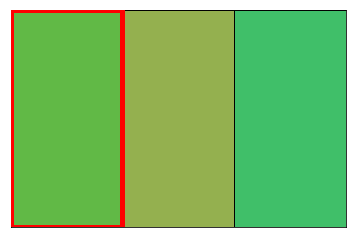

192) Game: 6719-f Round: 45
brown


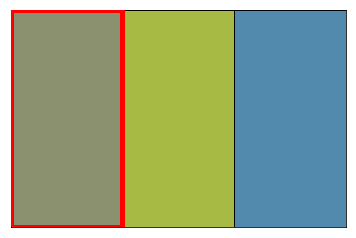

193) Game: 6719-f Round: 46
blue


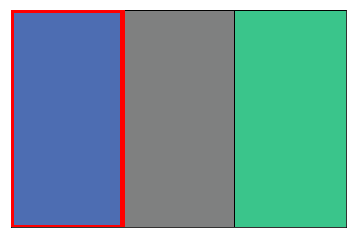

194) Game: 6719-f Round: 47
magenta


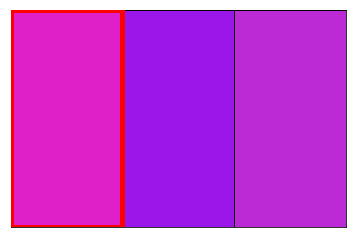

195) Game: 6719-f Round: 48
dark grey


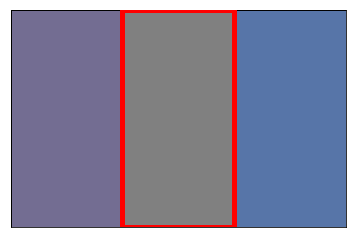

196) Game: 6719-f Round: 49
DARK YOU IDIOT. This one is orange


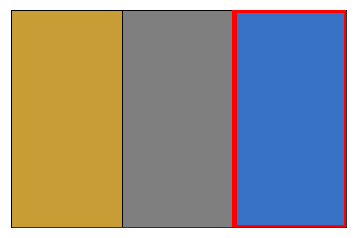

197) Game: 6719-f Round: 50
dark purple


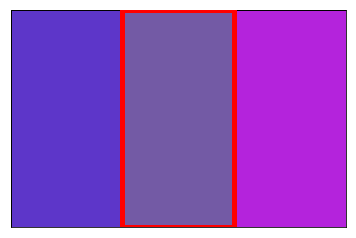

In [193]:
train_data.display_game_for_gameid("6719-f")

39) Game: 1124-1 Round: 41
blue


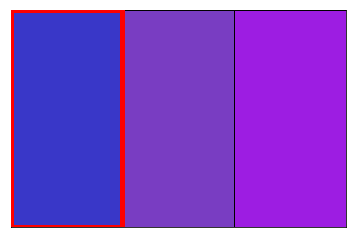

In [186]:
train_data.display_game(39)

41) Game: 1124-1 Round: 43
blue


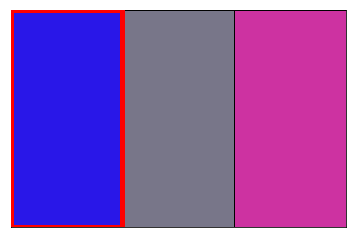

In [187]:
train_data.display_game(41)

How often people use words like "left" and "right" (usually these are for affirmation)

In [203]:
directional_counter = 0
directional_indices = set()
for i, ent in enumerate(train_data):
    for word in ent.tokens:
        if word in ("right", "left"):
            directional_counter += 1
            directional_indices.add(i)
            

1915) Game: 2780-1 Round: 1
Hello :) I'm ready whenever you are.


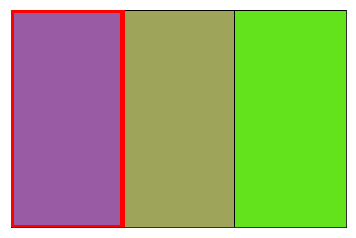

1916) Game: 2780-1 Round: 1
Hi - pick the same color as in the example given before.


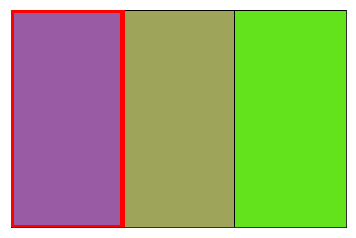

1917) Game: 2780-1 Round: 2
The color to pick is the one that is not neon.


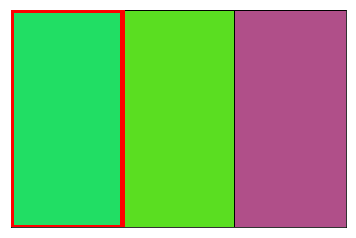

1918) Game: 2780-1 Round: 3
The color to pick is the lighter of the same two colors.


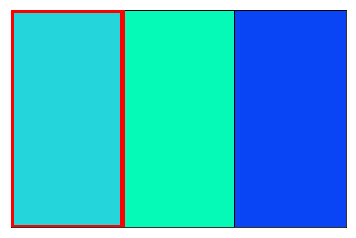

1919) Game: 2780-1 Round: 4
The color to pick is like... poo.


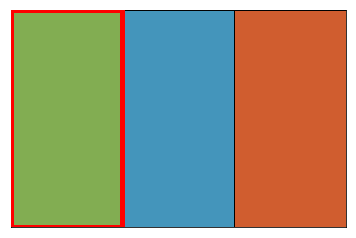

1920) Game: 2780-1 Round: 4
It could be the color of grass...


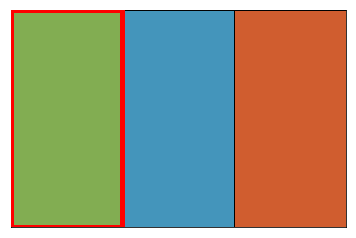

1921) Game: 2780-1 Round: 5
This is the color of a rainy sky.


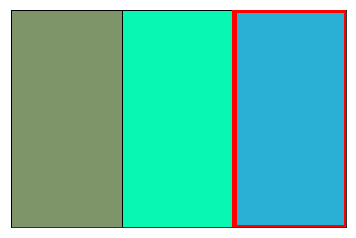

1922) Game: 2780-1 Round: 6
The color of a RAINY sky...


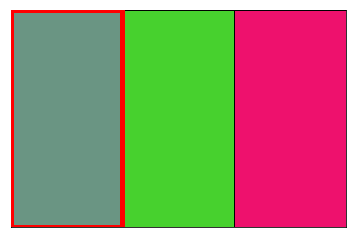

1923) Game: 2780-1 Round: 6
That last one looks more green than gray for me sorry...


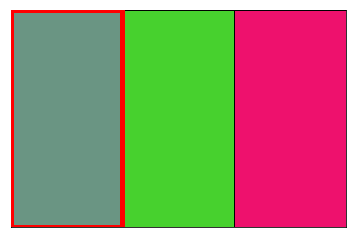

1924) Game: 2780-1 Round: 7
No worries! This time, pick the color of a bright lipstick.


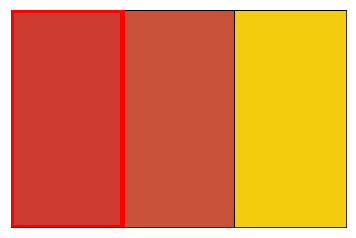

1925) Game: 2780-1 Round: 8
Purple pink or blue?


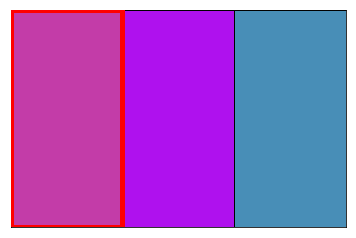

1926) Game: 2780-1 Round: 8
Pink. Are we allowed to say colors?


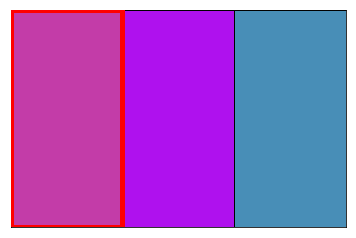

1927) Game: 2780-1 Round: 8
Holy c**p. Okay.


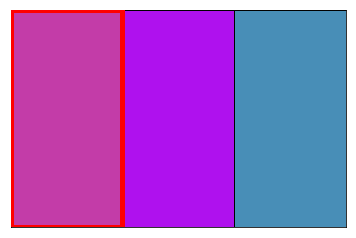

1928) Game: 2780-1 Round: 8
Lol you're not I'm just letting you know how I see the colors


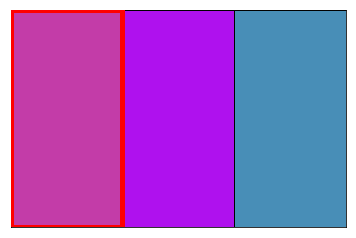

1929) Game: 2780-1 Round: 9
greenish-gray


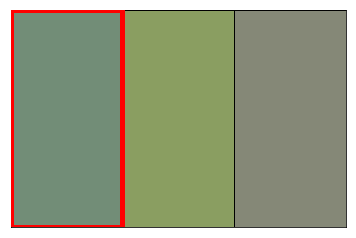

1930) Game: 2780-1 Round: 10
Or the stormy color of a sky?


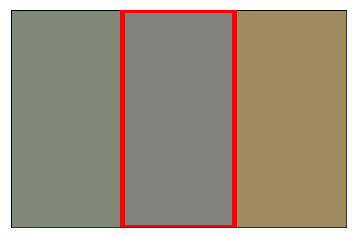

1931) Game: 2780-1 Round: 10
Stormy


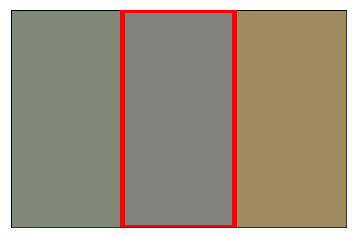

1932) Game: 2780-1 Round: 11
Greenish-gray


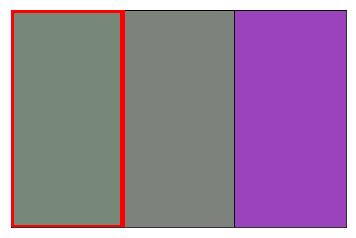

1933) Game: 2780-1 Round: 11
Damn... I clicked the stormy one


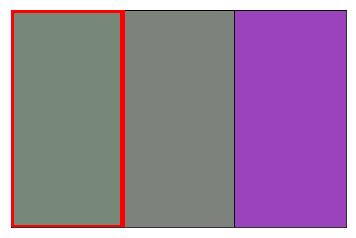

1934) Game: 2780-1 Round: 12
You did good.


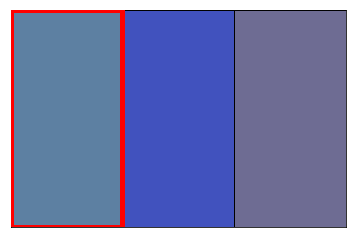

1935) Game: 2780-1 Round: 12
light blue


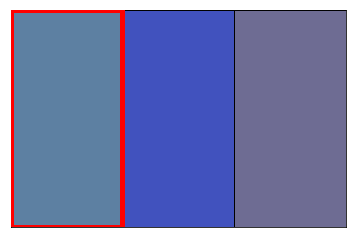

1936) Game: 2780-1 Round: 13
blue


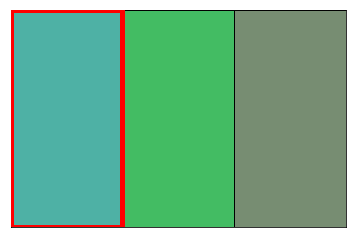

1937) Game: 2780-1 Round: 14
Does it tell you when you're right?


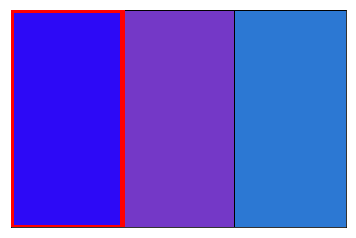

1938) Game: 2780-1 Round: 14
darker blue


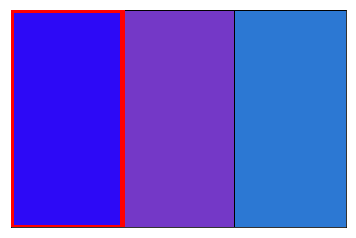

1939) Game: 2780-1 Round: 15
This could be the color of an autumn leaf...


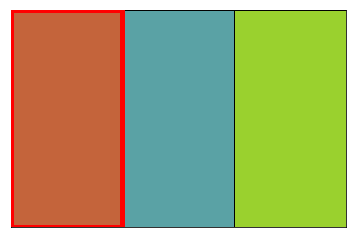

1940) Game: 2780-1 Round: 16
Does it tell you what I picked?


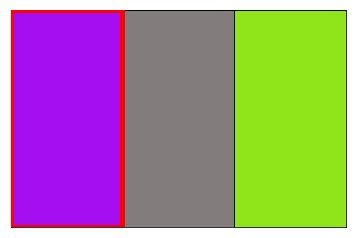

1941) Game: 2780-1 Round: 16
Yep


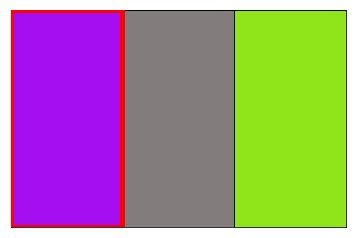

1942) Game: 2780-1 Round: 16
This is an easter egg color, also a color in the rainbow


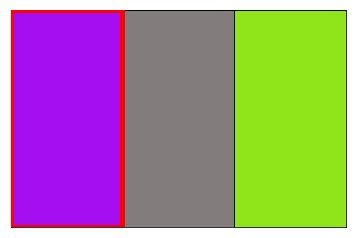

1943) Game: 2780-1 Round: 17
The color of a stormy sky.


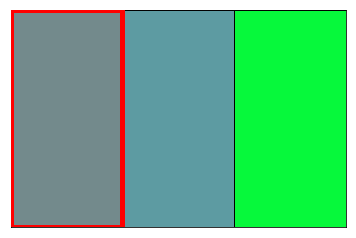

1944) Game: 2780-1 Round: 18
At least we got stormy sky down lol


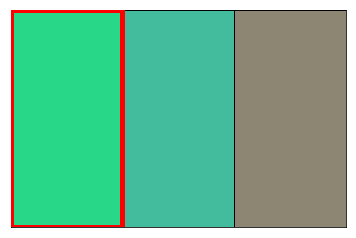

1945) Game: 2780-1 Round: 18
A combination of yellow and green.


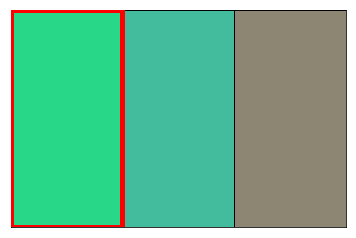

1946) Game: 2780-1 Round: 19
ouch


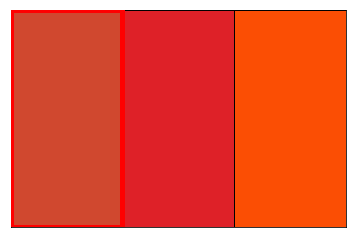

1947) Game: 2780-1 Round: 19
ummm... bright, muted, or regular


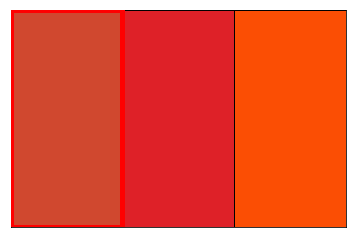

1948) Game: 2780-1 Round: 19
This is a matte lipstick color. Muted.


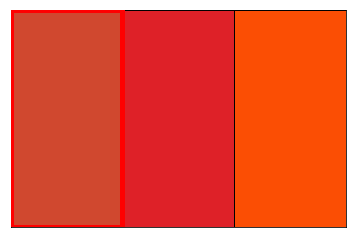

1949) Game: 2780-1 Round: 20
Like a daffodil


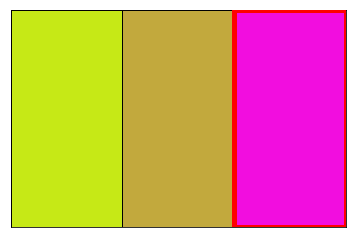

1950) Game: 2780-1 Round: 20
grass poo or lipstick Lol


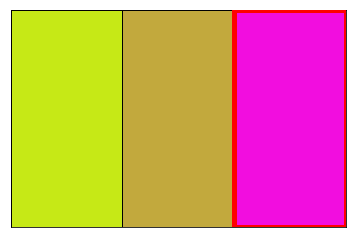

1951) Game: 2780-1 Round: 21
Dafflodils are yellow, BTW.


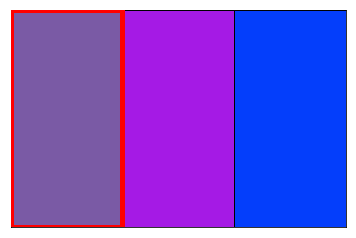

1952) Game: 2780-1 Round: 21
Muted color.


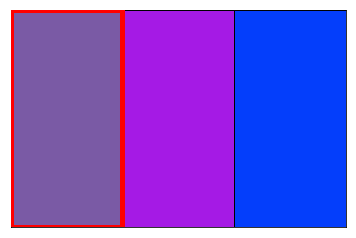

1953) Game: 2780-1 Round: 21
Opps that looked green on my end


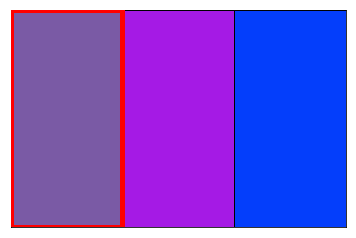

1954) Game: 2780-1 Round: 21
I swear I'm not color blind.


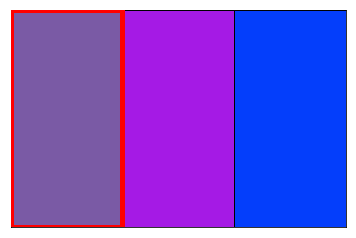

1955) Game: 2780-1 Round: 21
Hmmm. Screens do show colors differently.


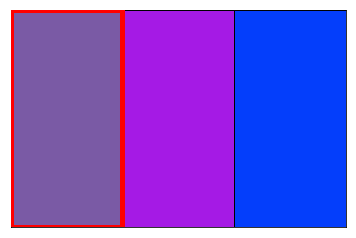

1956) Game: 2780-1 Round: 21
Pick the muted color.


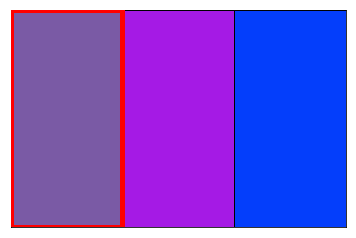

1957) Game: 2780-1 Round: 22
Bright color.


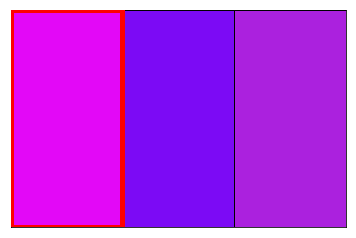

1958) Game: 2780-1 Round: 23
Bright color.


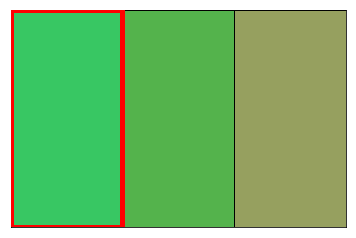

1959) Game: 2780-1 Round: 24
Bright lipstick!


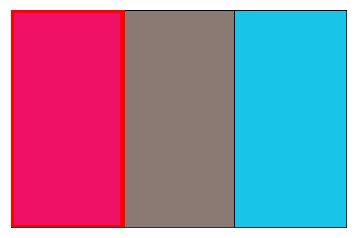

1960) Game: 2780-1 Round: 25
Also could be a lipstick color.


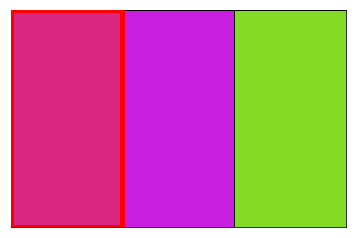

1961) Game: 2780-1 Round: 25
grape flavored or strawberry


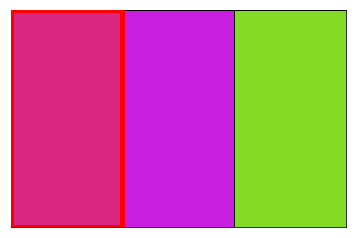

1962) Game: 2780-1 Round: 25
Strawberry


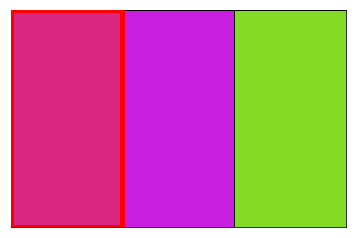

1963) Game: 2780-1 Round: 26
grass


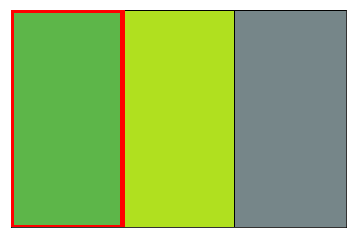

1964) Game: 2780-1 Round: 26
I've worn purple lipstick before ;)


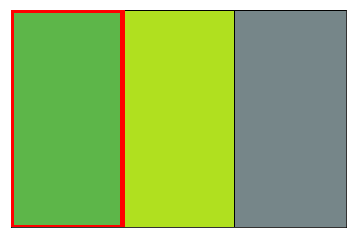

1965) Game: 2780-1 Round: 27
blunder years?


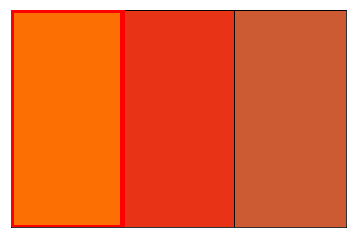

1966) Game: 2780-1 Round: 27
Yep


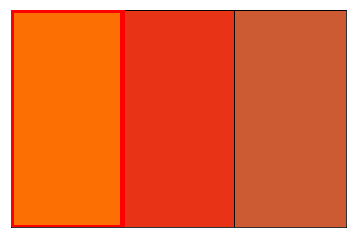

1967) Game: 2780-1 Round: 27
Pumpkin


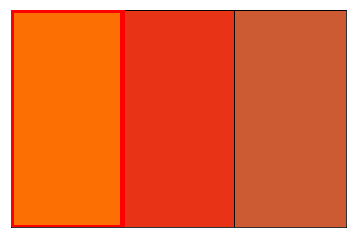

1968) Game: 2780-1 Round: 28
grass


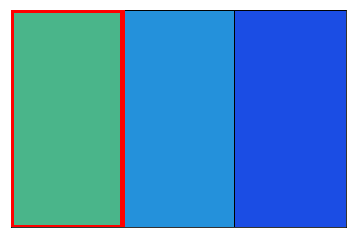

1969) Game: 2780-1 Round: 29
The non-muted of the two colors.


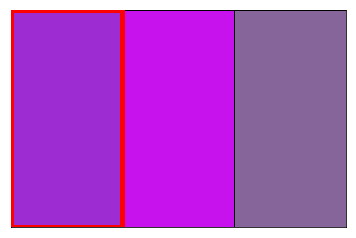

1970) Game: 2780-1 Round: 30
grass


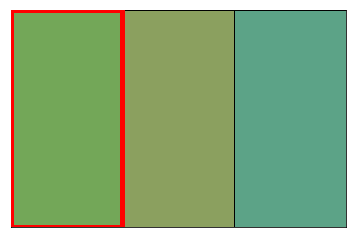

1971) Game: 2780-1 Round: 31
Your blunder years lipstick.


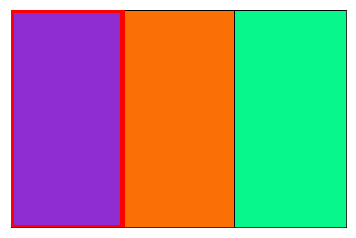

1972) Game: 2780-1 Round: 31
lol


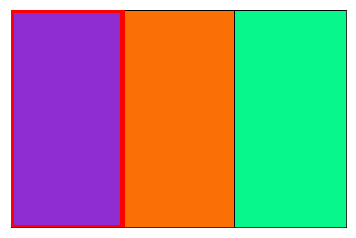

1973) Game: 2780-1 Round: 32
LMAO


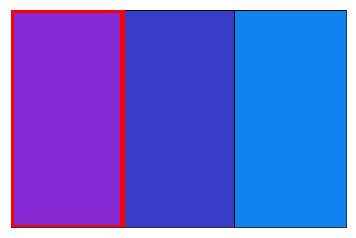

1974) Game: 2780-1 Round: 32
Blunder years lipstick again...


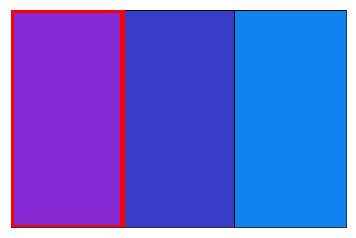

1975) Game: 2780-1 Round: 33
Stormy sky


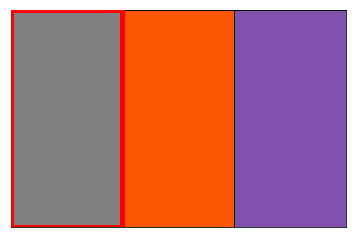

1976) Game: 2780-1 Round: 34
grass


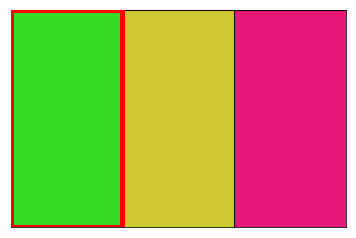

1977) Game: 2780-1 Round: 35
toddler poo


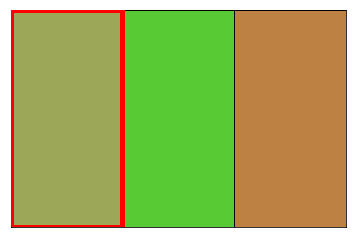

1978) Game: 2780-1 Round: 36
toddler poo


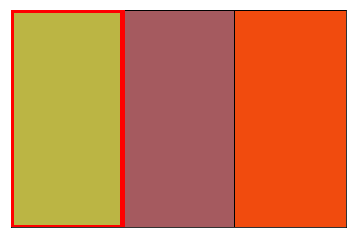

1979) Game: 2780-1 Round: 37
the brighter one


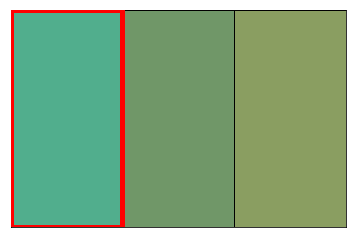

1980) Game: 2780-1 Round: 38
Not pumpkin, not stormy sky


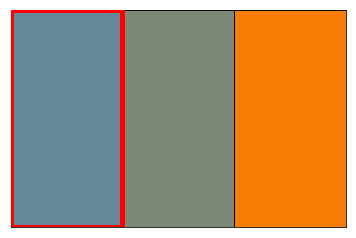

1981) Game: 2780-1 Round: 39
stormy


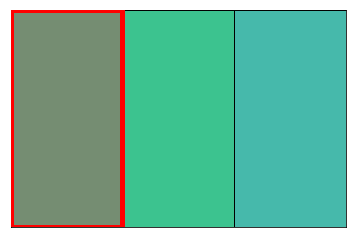

1982) Game: 2780-1 Round: 40
sunny sky


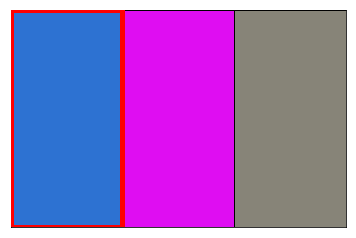

1983) Game: 2780-1 Round: 41
blunder years


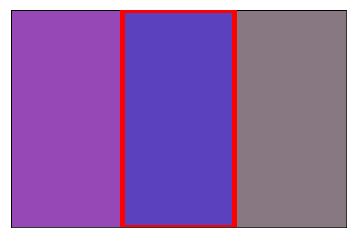

1984) Game: 2780-1 Round: 42
toddler poo


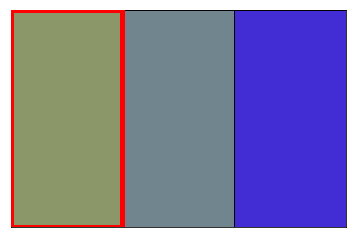

1985) Game: 2780-1 Round: 43
stormy


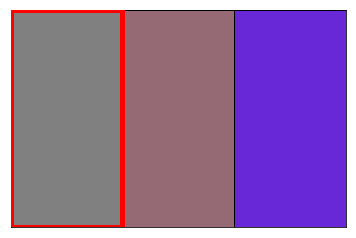

1986) Game: 2780-1 Round: 43
Wow... love your descriptions Lol


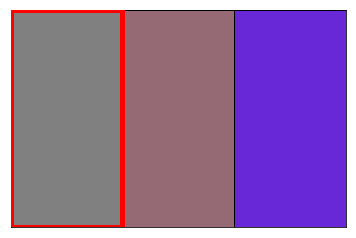

1987) Game: 2780-1 Round: 45
oh, uh. ok.


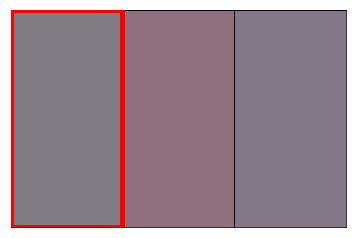

1988) Game: 2780-1 Round: 45
Oh wow... um grape strawberry or stomy


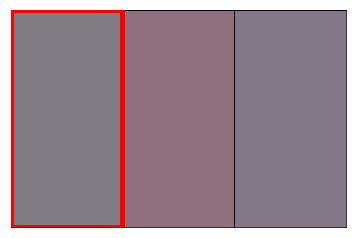

1989) Game: 2780-1 Round: 45
the muted one of the two... i think


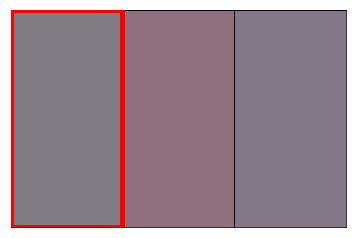

1990) Game: 2780-1 Round: 45
stormy?


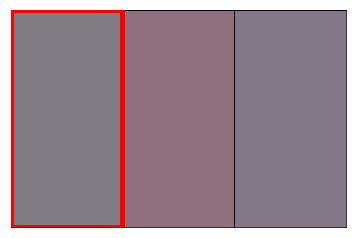

1991) Game: 2780-1 Round: 46
Yes!


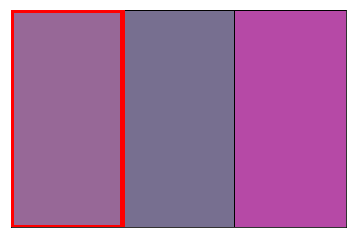

1992) Game: 2780-1 Round: 46
Muted blunder years


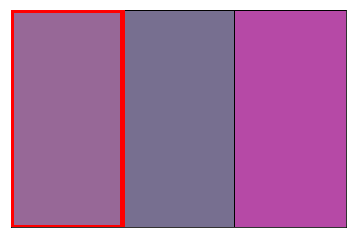

1993) Game: 2780-1 Round: 47
Looks like really bright grass


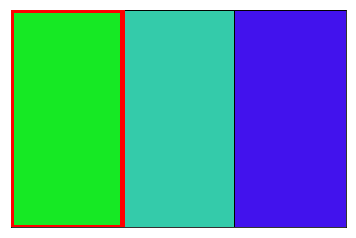

1994) Game: 2780-1 Round: 48
muted grass


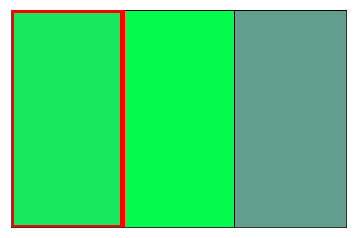

1995) Game: 2780-1 Round: 48
wow again


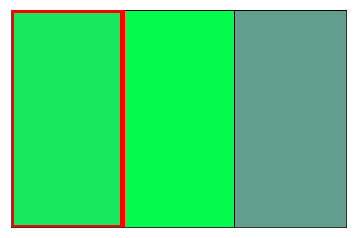

1996) Game: 2780-1 Round: 49
purple blue teal


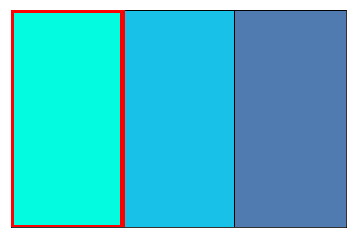

1997) Game: 2780-1 Round: 49
last one


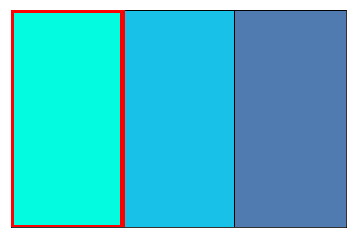

1998) Game: 2780-1 Round: 49
They're not in the same order on my screen remember?


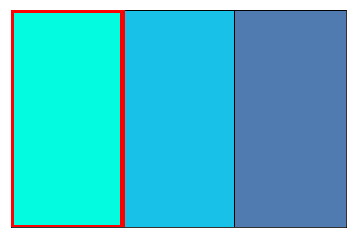

1999) Game: 2780-1 Round: 49
The last one you wrote.


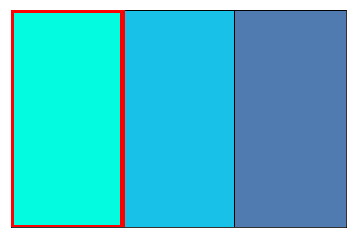

2000) Game: 2780-1 Round: 50
ohhhh lol


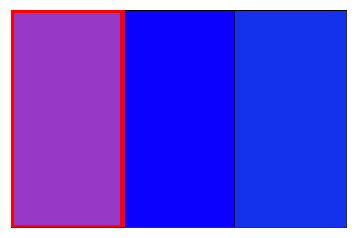

2001) Game: 2780-1 Round: 50
Ha ha - blunder years!


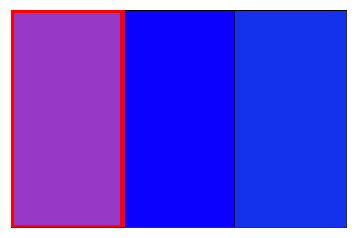

In [214]:
full_data.display_game_for_gameid("2780-1")

1653) Game: 2780-1 Round: 14
Does it tell you when you're right? ~ darker blue


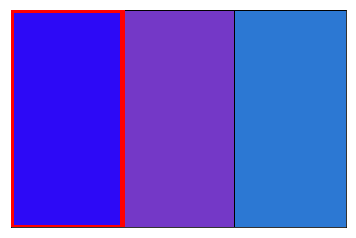

In [212]:
train_data.display_game(1653)

In [215]:
from collections import Counter

In [198]:
directional_counter

184

In [ ]:
# most common words in each cluster

In [219]:
cluster_words = [Counter() for _ in range(len(clusters))]
for ci, c in enumerate(clusters):
    for i in range(len(c)):
        for word in train_data[c[i][0]].tokens:
            cluster_words[ci][word.lower()] += 1

In [223]:
for i in range(len(cluster_words)):
    print("Cluster", i)
    print(cluster_words[i].most_common()[:10])

Cluster 0
[('blue', 453), ('the', 92), ('bright', 51), ('purple', 47), ('~', 47), ('dark', 39), (',', 33), ('not', 31), ('.', 30), ('darkest', 24)]
Cluster 1
[('blue', 448), ('the', 127), ('~', 64), ('bright', 63), ('sky', 44), ('not', 43), (',', 38), ('one', 29), ('light', 26), ('lighter', 25)]
Cluster 2
[('green', 286), ('the', 196), ('yellow', 160), ('brown', 144), ('~', 121), ('not', 83), ('one', 83), ('tan', 82), ('olive', 52), (',', 50)]
Cluster 3
[('green', 648), ('the', 257), ('~', 156), ('not', 128), ('grey', 97), (',', 92), ('one', 90), ('olive', 69), ('of', 68), ('darker', 68)]
Cluster 4
[('pink', 288), ('purple', 227), ('the', 112), ('bright', 97), ('~', 50), ('hot', 49), ('brightest', 41), (',', 38), ('one', 36), ('not', 36)]
Cluster 5
[('green', 460), ('bright', 137), ('the', 119), ('neon', 58), ('~', 54), ('not', 48), ('brightest', 47), ('lime', 40), (',', 39), ('.', 39)]
Cluster 6
[('yellow', 326), ('green', 94), ('the', 74), ('~', 48), ('bright', 43), ('one', 32), ('no

(array([715.,  41.,   9.,   3.,   2.,   4.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 1.8350e+02, 3.6600e+02, 5.4850e+02, 7.3100e+02,
        9.1350e+02, 1.0960e+03, 1.2785e+03, 1.4610e+03, 1.6435e+03,
        1.8260e+03]),
 <a list of 10 Patch objects>)

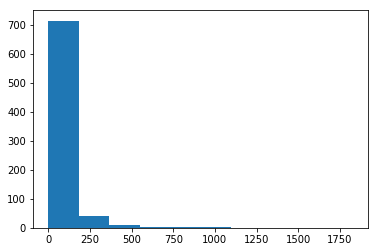

In [227]:
plt.hist(full_data.data.workerid_uniq.value_counts())

In [228]:
full_data.data.workerid_uniq.nunique()

775

In [249]:
train_data.data.gameid.nunique()

316

In [229]:
train_data.data.workerid_uniq.nunique()

232

In [299]:
correctness_by_worker = train_data.data.groupby(['gameid'])['numOutcome'].mean()

In [305]:
correctness_by_worker

gameid
0082-c    0.860000
0261-d    0.900000
0312-7    0.977273
0365-1    0.820000
0377-b    0.979592
0429-9    0.869565
0437-f    1.000000
0495-0    0.840000
0517-a    0.880000
0519-6    0.980000
0763-2    0.918367
0811-5    0.980000
0813-a    0.860000
0868-b    0.860000
0881-5    0.900000
0895-b    0.780000
0897-4    0.980000
0968-a    0.900000
1033-6    0.740000
1033-9    0.880000
1058-9    0.880000
1124-1    0.857143
1178-5    0.920000
1184-f    0.880000
1218-8    0.920000
1220-a    0.820000
1293-8    0.938776
1325-8    0.820000
1421-1    0.880000
1473-7    1.000000
            ...   
9224-2    0.920000
9245-3    0.700000
9266-e    0.800000
9300-8    0.900000
9318-7    0.980000
9320-9    0.860000
9342-d    0.860000
9346-5    0.940000
9353-3    0.840000
9391-f    0.900000
9447-5    0.918367
9520-5    0.740000
9536-4    0.960000
9544-2    0.900000
9617-0    0.959184
9645-a    0.860000
9666-b    0.520000
9674-b    0.875000
9680-6    0.880000
9689-6    0.880000
9713-c    0.840000
9817-

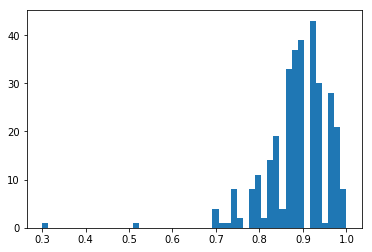

In [310]:
plt.hist(correctness_by_worker, 50)
plt.show()

In [311]:
# this is giving more weight to rounds with longer conversations with multiple interactions within the game
correctness_by_worker_full = full_data.data.groupby(['gameid'])['numOutcome'].mean()

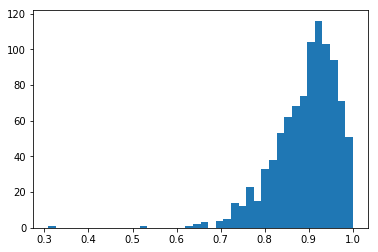

In [315]:
plt.hist(correctness_by_worker_full, 40)
plt.show()

In [313]:
correctness_by_worker_full.shape

(948,)

In [319]:
correctness_by_worker_perspeaker = train_data.data.groupby(['workerid_uniq'])['numOutcome'].mean()

In [320]:
correctness_by_worker_perspeaker.shape

(232,)

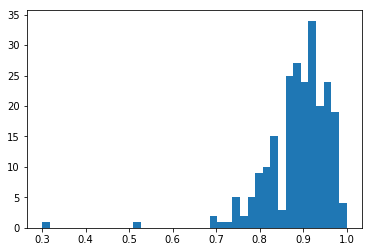

In [321]:
plt.hist(correctness_by_worker_perspeaker, 40)
plt.show()

In [287]:
correctness_by_worker[correctness_by_worker == 15]

gameid
6765-a    15.0
Name: numOutcome, dtype: float64

In [283]:
train_data.data.gameid.drop_duplicates().values[198]

'7963-e'

In [263]:
train_data.data.gameid.nunique()

316

(array([  1.,   2.,   0.,   1.,   2.,   1.,   3.,   5.,  13., 288.]),
 array([39. , 40.1, 41.2, 42.3, 43.4, 44.5, 45.6, 46.7, 47.8, 48.9, 50. ]),
 <a list of 10 Patch objects>)

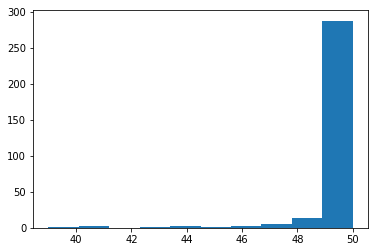

In [268]:
plt.hist(train_data.data.groupby('gameid').size())

3513) Game: 6765-a Round: 1
in the center ~ pink


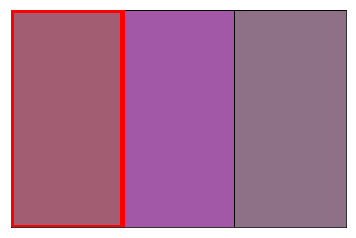

3514) Game: 6765-a Round: 2
on the left purple


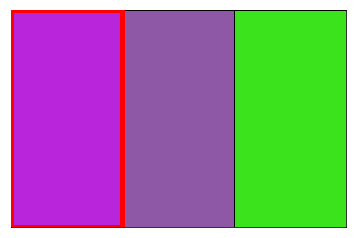

3515) Game: 6765-a Round: 3
in the center blue


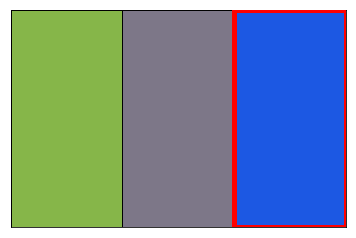

3516) Game: 6765-a Round: 4
in the center


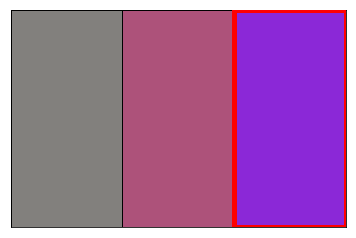

3517) Game: 6765-a Round: 5
doesn't matter


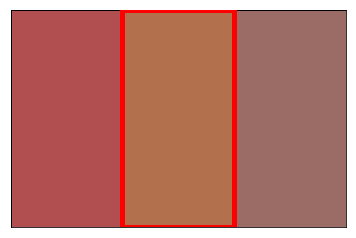

3518) Game: 6765-a Round: 6
green on the right


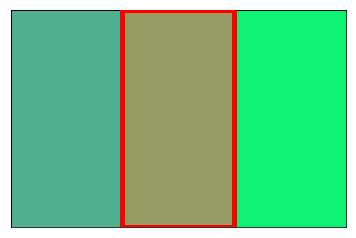

3519) Game: 6765-a Round: 7
beige on the right


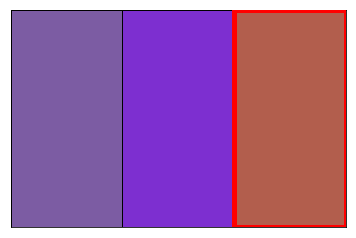

3520) Game: 6765-a Round: 8
in the center green


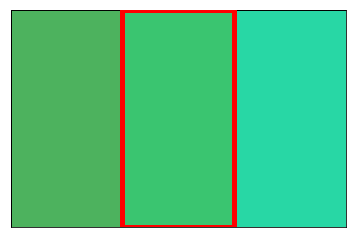

3521) Game: 6765-a Round: 9
inthe center red


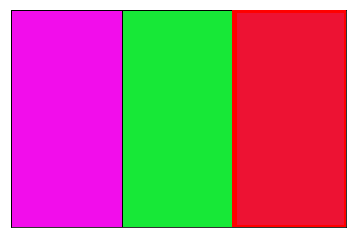

3522) Game: 6765-a Round: 10
in the center pink


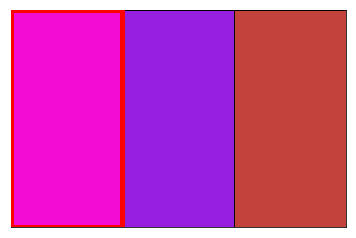

3523) Game: 6765-a Round: 11
on the right azure


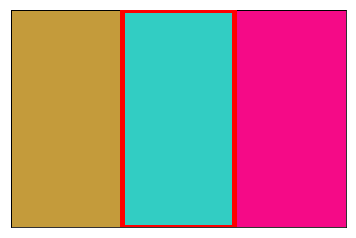

3524) Game: 6765-a Round: 12
in the center yellow


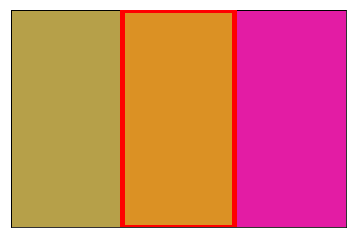

3525) Game: 6765-a Round: 13
on the left coffee


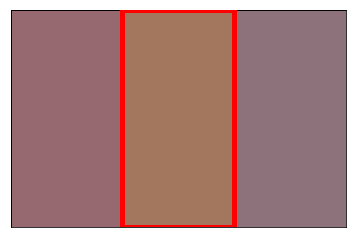

3526) Game: 6765-a Round: 14
on the right purple


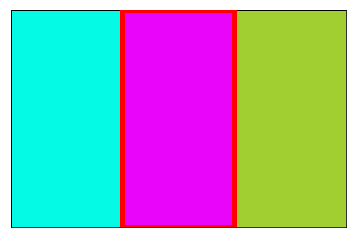

3527) Game: 6765-a Round: 15
in the center green


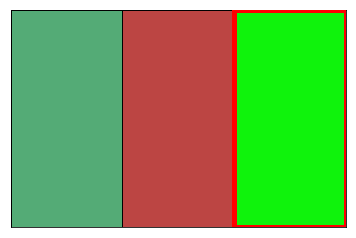

3528) Game: 6765-a Round: 16
in the center pink


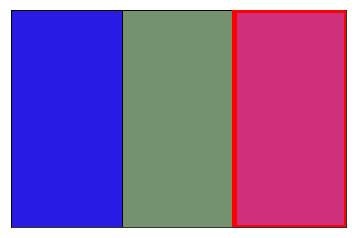

3529) Game: 6765-a Round: 17
in the center yellow


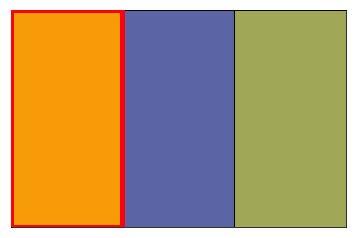

3530) Game: 6765-a Round: 18
in the center green


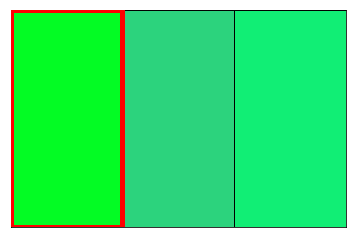

3531) Game: 6765-a Round: 19
on the right blue


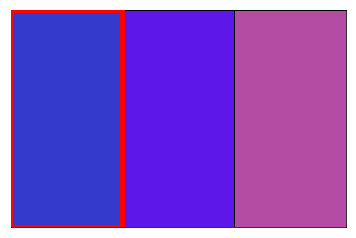

3532) Game: 6765-a Round: 20
in the center grey


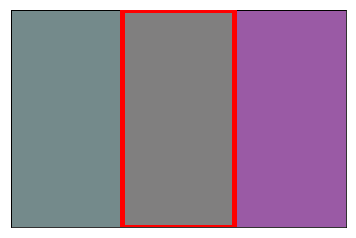

3533) Game: 6765-a Round: 21
on the right violet


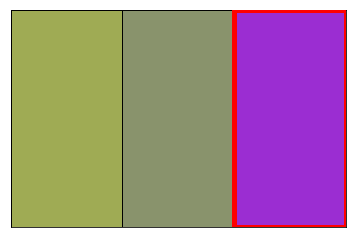

3534) Game: 6765-a Round: 22
in the center green


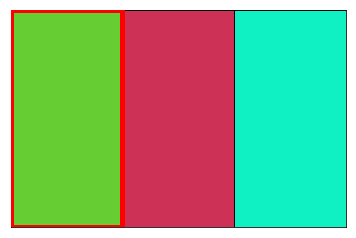

3535) Game: 6765-a Round: 23
on the left seawater


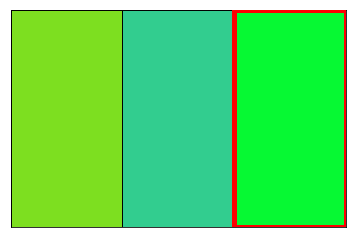

3536) Game: 6765-a Round: 24
on the right orange


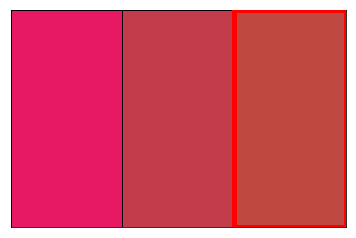

3537) Game: 6765-a Round: 25
in the center yellow


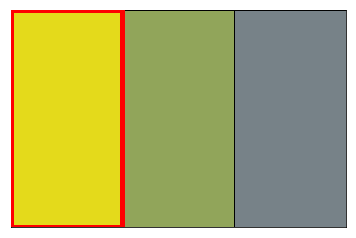

3538) Game: 6765-a Round: 26
on the left green


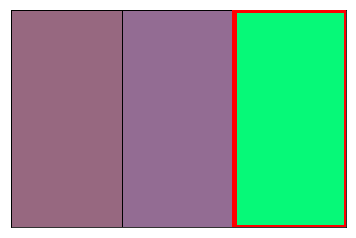

3539) Game: 6765-a Round: 27
on the left red


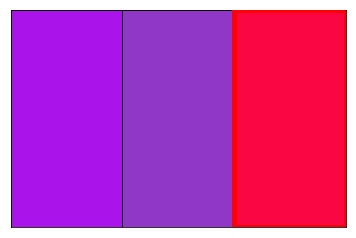

3540) Game: 6765-a Round: 28
in the center green


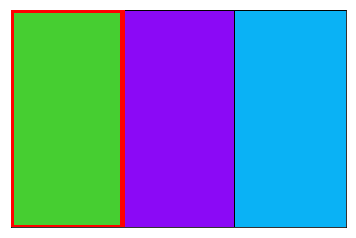

3541) Game: 6765-a Round: 29
in the center green


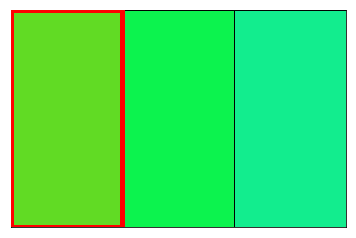

3542) Game: 6765-a Round: 30
on the right orange


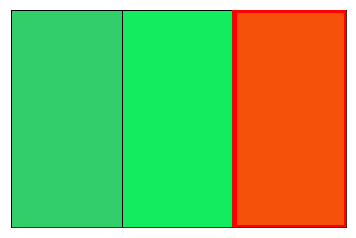

3543) Game: 6765-a Round: 31
in the center pink


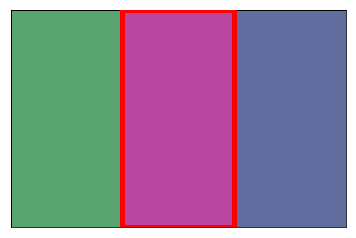

3544) Game: 6765-a Round: 32
on the right green


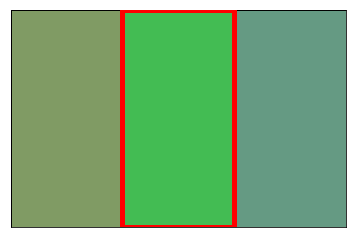

3545) Game: 6765-a Round: 33
on the right blue


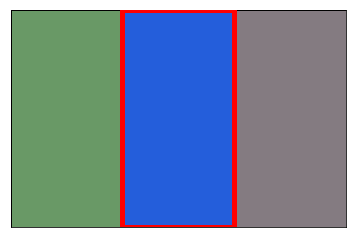

3546) Game: 6765-a Round: 34
in the center blue


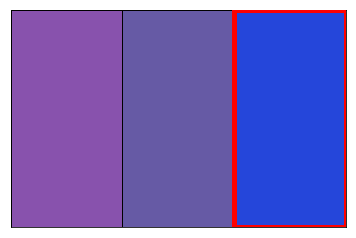

3547) Game: 6765-a Round: 35
on the left grey


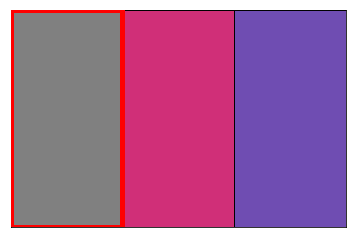

3548) Game: 6765-a Round: 36
in the center grey


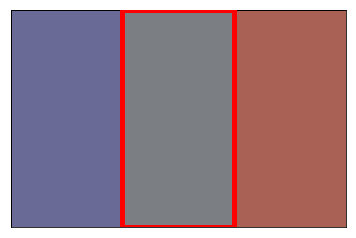

3549) Game: 6765-a Round: 37
in the center red


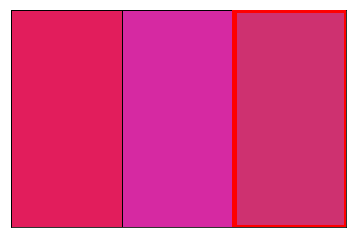

3550) Game: 6765-a Round: 38
on the left pink


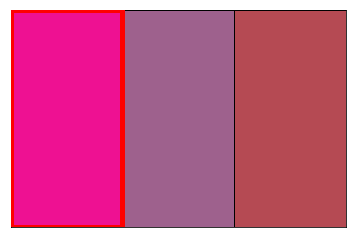

3551) Game: 6765-a Round: 39
on the left orange


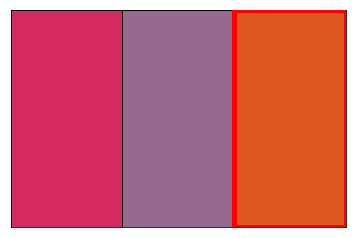

3552) Game: 6765-a Round: 40
in the center carrot


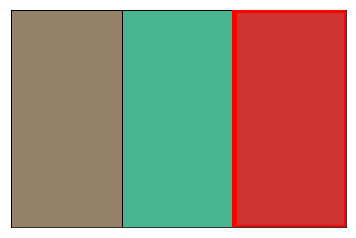

3553) Game: 6765-a Round: 41
on the right blue


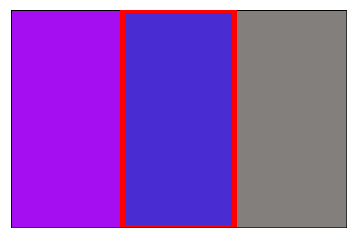

3554) Game: 6765-a Round: 42
on the left sage


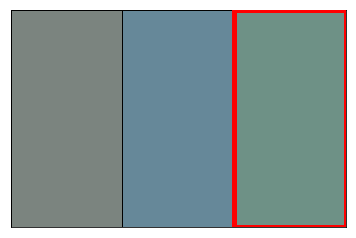

3555) Game: 6765-a Round: 43
on the left green


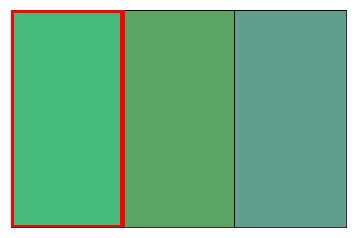

3556) Game: 6765-a Round: 44
on the right pink


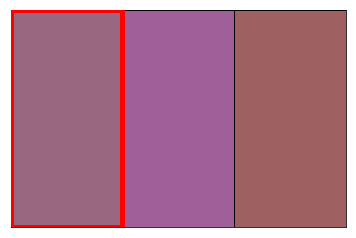

3557) Game: 6765-a Round: 45
on the right yellow


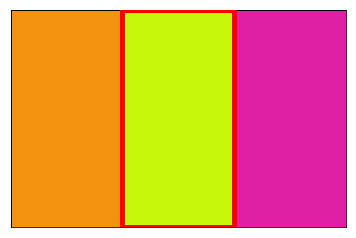

3558) Game: 6765-a Round: 46
in the center grey


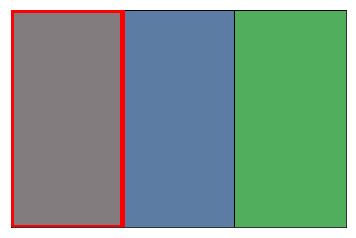

3559) Game: 6765-a Round: 47
on the left grey


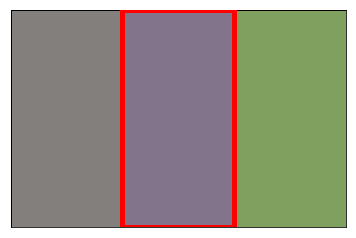

3560) Game: 6765-a Round: 48
on the left green


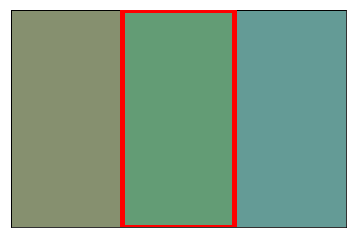

3561) Game: 6765-a Round: 49
on the left azure


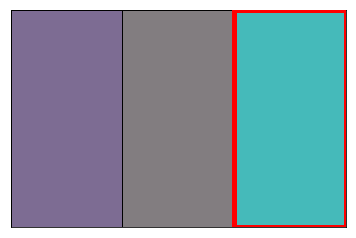

3562) Game: 6765-a Round: 50
on the right pink


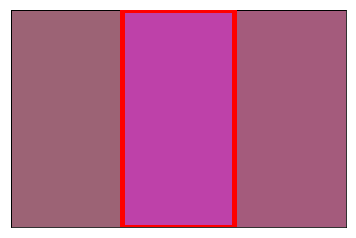

In [289]:
train_data.display_game_for_gameid('6765-a')

In [267]:
train_data.data[-1:]

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
15664,8994-5,1.476490e+12,50,close,target,231,43,50,2,3,...,1.476490e+12,speaker,purple darker,794.0,1.0,2,12,12.0,2.0,human


4258) Game: 6765-a Round: 1
in the center


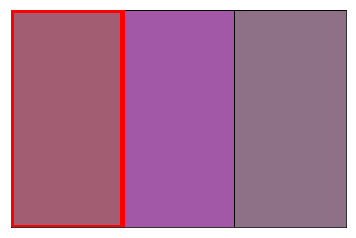

4259) Game: 6765-a Round: 1
which color?


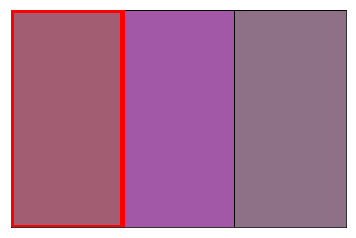

4260) Game: 6765-a Round: 1
pink


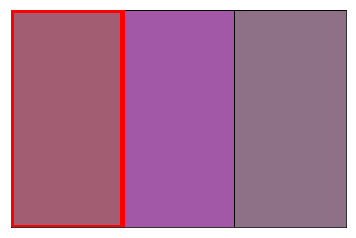

4261) Game: 6765-a Round: 2
on the left purple


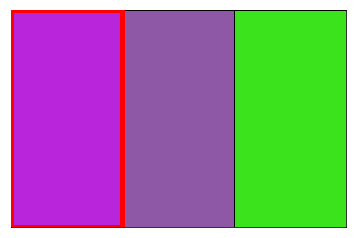

4262) Game: 6765-a Round: 3
in the center blue


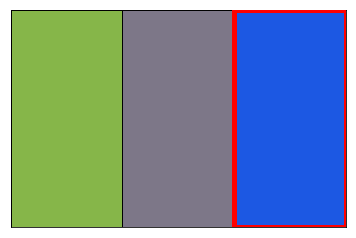

4263) Game: 6765-a Round: 4
in the center


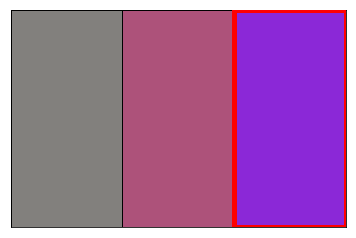

4264) Game: 6765-a Round: 4
color?


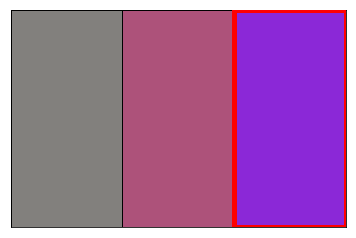

4265) Game: 6765-a Round: 5
doesn't matter


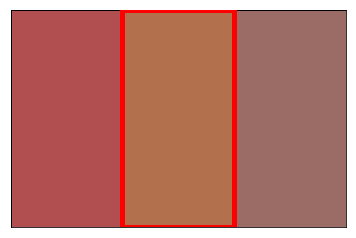

4266) Game: 6765-a Round: 5
just give me the color. the position is different for both of us


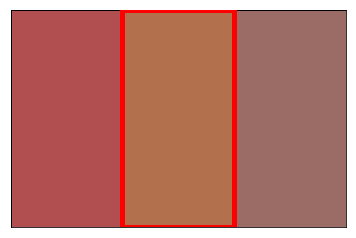

4267) Game: 6765-a Round: 6
green on the right


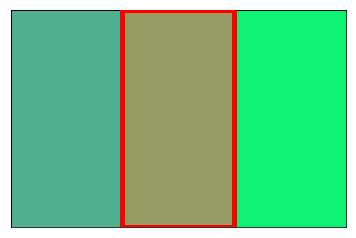

4268) Game: 6765-a Round: 7
beige on the right


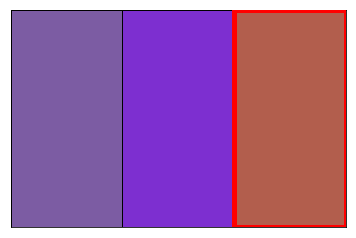

4269) Game: 6765-a Round: 8
in the center green


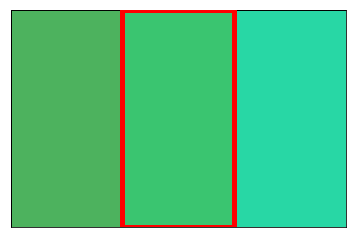

4270) Game: 6765-a Round: 9
inthe center red


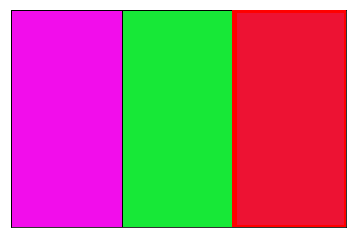

4271) Game: 6765-a Round: 10
in the center pink


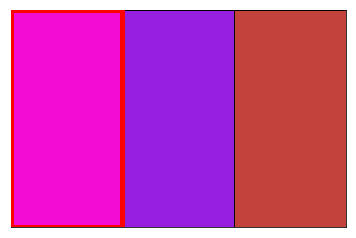

4272) Game: 6765-a Round: 11
on the right azure


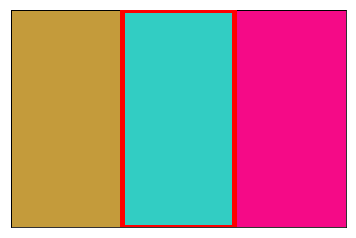

4273) Game: 6765-a Round: 12
in the center yellow


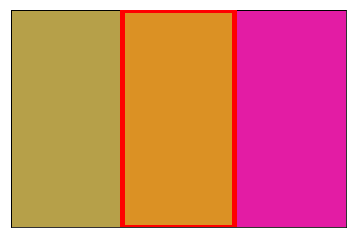

4274) Game: 6765-a Round: 13
on the left coffee


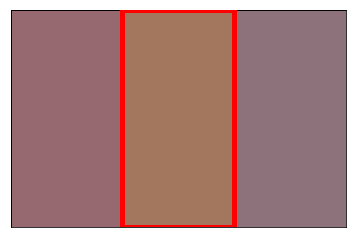

4275) Game: 6765-a Round: 14
on the right purple


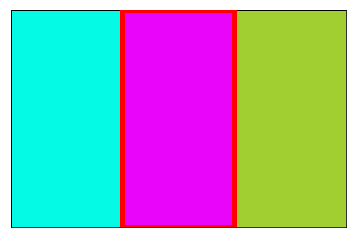

4276) Game: 6765-a Round: 15
in the center green


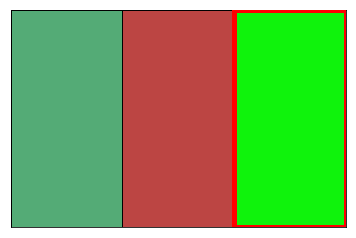

4277) Game: 6765-a Round: 16
in the center pink


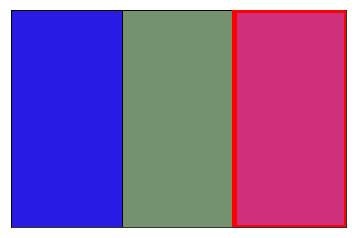

4278) Game: 6765-a Round: 17
in the center yellow


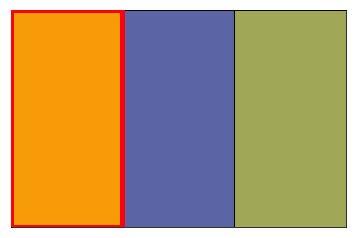

4279) Game: 6765-a Round: 18
in the center green


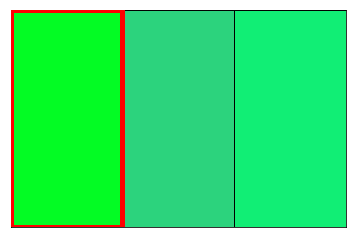

4280) Game: 6765-a Round: 19
on the right blue


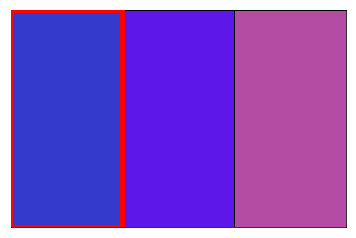

4281) Game: 6765-a Round: 20
in the center grey


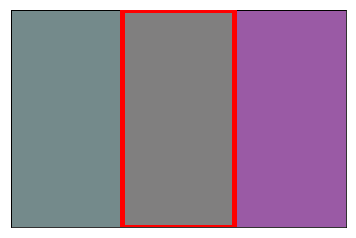

4282) Game: 6765-a Round: 21
on the right violet


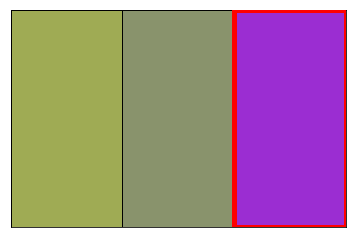

4283) Game: 6765-a Round: 22
in the center green


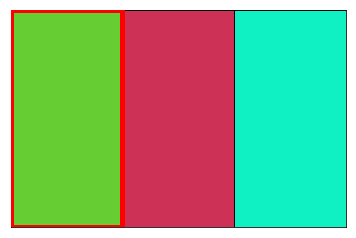

4284) Game: 6765-a Round: 23
on the left seawater


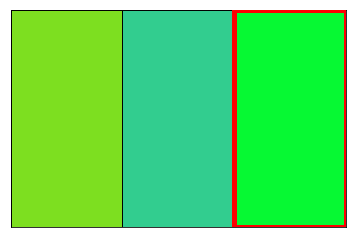

4285) Game: 6765-a Round: 24
on the right orange


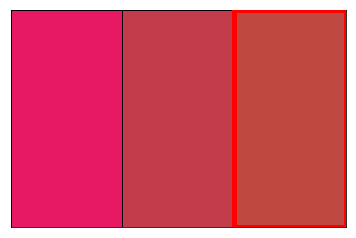

4286) Game: 6765-a Round: 25
in the center yellow


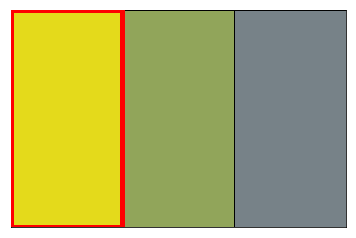

4287) Game: 6765-a Round: 26
on the left green


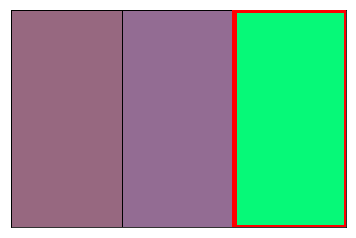

4288) Game: 6765-a Round: 27
on the left red


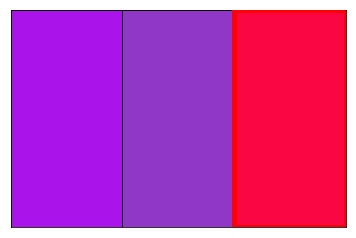

4289) Game: 6765-a Round: 28
in the center green


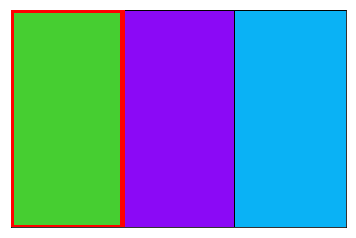

4290) Game: 6765-a Round: 29
in the center green


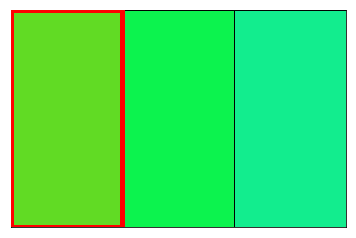

4291) Game: 6765-a Round: 30
on the right orange


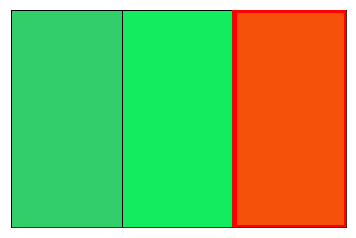

4292) Game: 6765-a Round: 31
in the center pink


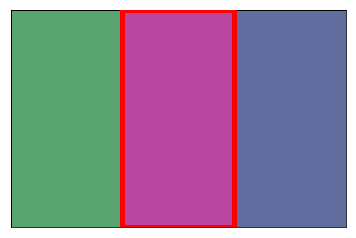

4293) Game: 6765-a Round: 32
on the right green


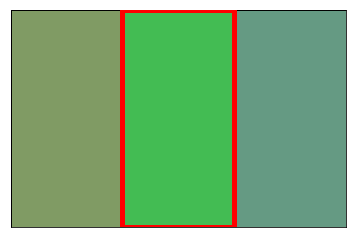

4294) Game: 6765-a Round: 33
on the right blue


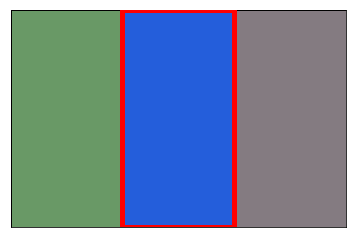

4295) Game: 6765-a Round: 34
in the center blue


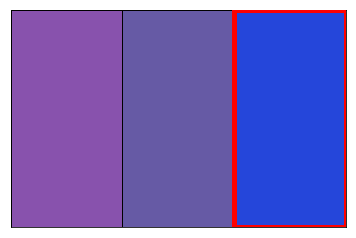

4296) Game: 6765-a Round: 34
Are you colorblind, perhaps?


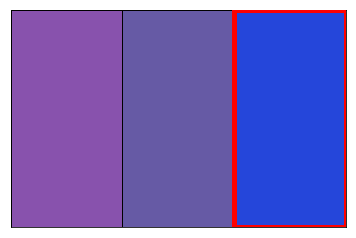

4297) Game: 6765-a Round: 35
on the left grey


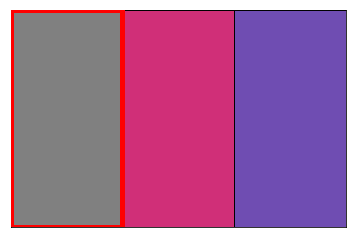

4298) Game: 6765-a Round: 36
in the center grey


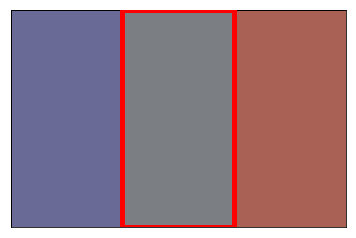

4299) Game: 6765-a Round: 37
in the center red


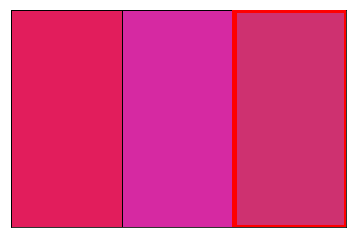

4300) Game: 6765-a Round: 38
on the left pink


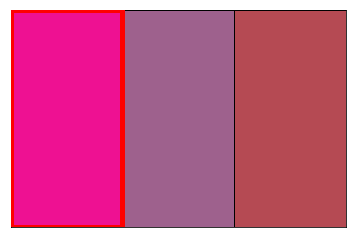

4301) Game: 6765-a Round: 39
on the left orange


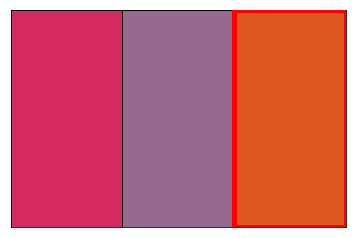

4302) Game: 6765-a Round: 40
in the center carrot


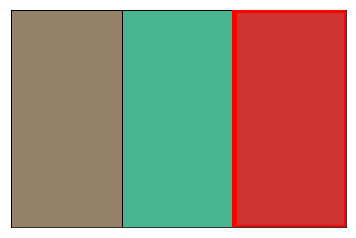

4303) Game: 6765-a Round: 41
on the right blue


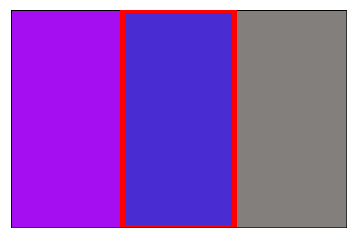

4304) Game: 6765-a Round: 42
on the left sage


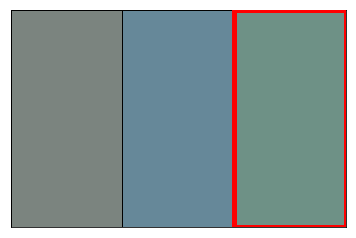

4305) Game: 6765-a Round: 43
on the left green


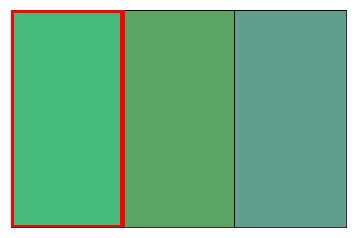

4306) Game: 6765-a Round: 44
on the right pink


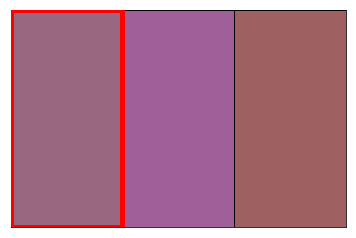

4307) Game: 6765-a Round: 45
on the right yellow


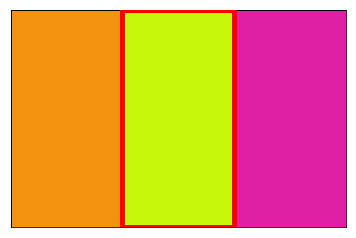

4308) Game: 6765-a Round: 46
in the center grey


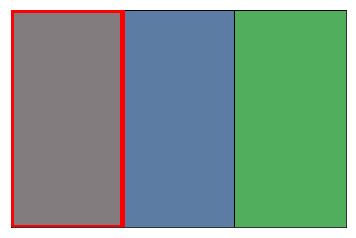

4309) Game: 6765-a Round: 47
on the left grey


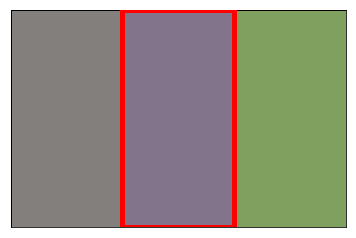

4310) Game: 6765-a Round: 48
on the left green


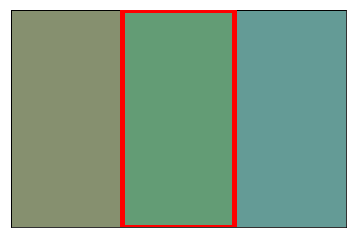

4311) Game: 6765-a Round: 49
on the left azure


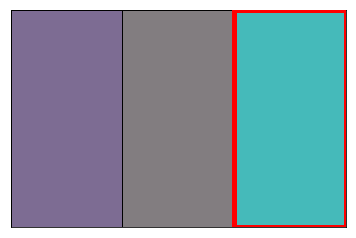

4312) Game: 6765-a Round: 50
on the right pink


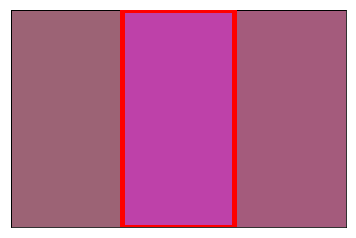

In [290]:
full_data.display_game_for_gameid('6765-a')

In [322]:
correctness_by_gamecond = train_data.data.groupby(['gameid', 'condition'])['numOutcome'].mean()

In [325]:
correctness_by_gamecond

gameid  condition
0082-c  close        0.750000
        far          0.941176
        split        0.882353
0261-d  close        0.812500
        far          1.000000
        split        0.882353
0312-7  close        0.923077
        far          1.000000
        split        1.000000
0365-1  close        0.687500
        far          0.941176
        split        0.823529
0377-b  close        1.000000
        far          1.000000
        split        0.941176
0429-9  close        0.750000
        far          1.000000
        split        0.823529
0437-f  close        1.000000
        far          1.000000
        split        1.000000
0495-0  close        0.750000
        far          0.941176
        split        0.823529
0517-a  close        0.812500
        far          0.941176
        split        0.882353
0519-6  close        0.941176
        far          1.000000
        split        1.000000
                       ...   
9713-c  close        0.705882
        far          1

0.884560272502378


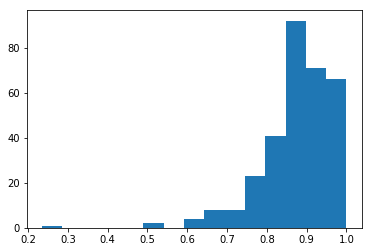

In [343]:
plt.hist(correctness_by_gamecond[:, 'split'], 15)
print(np.mean(correctness_by_gamecond[:, 'split']))
plt.show()

0.9637456564904433


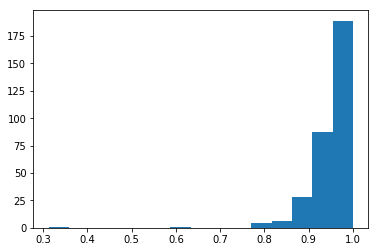

In [342]:
plt.hist(correctness_by_gamecond[:, 'far'], 15)
print(np.mean(correctness_by_gamecond[:, 'far']))
plt.show()

0.8102754258957712


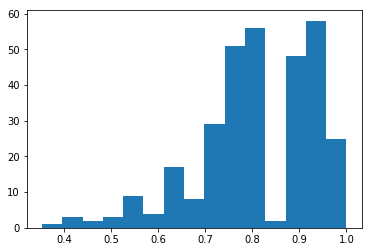

In [346]:
plt.hist(correctness_by_gamecond[:, 'close'], 15)
print(np.mean(correctness_by_gamecond[:, 'close']))
plt.show()

In [341]:
np.mean(correctness_by_gamecond[:, 'close'])

0.8102754258957712

In [332]:
len(correctness_by_gamecond)

948

In [326]:
correctness_by_gamecond = train_data.data.groupby(['gameid', 'condition'])['numOutcome'].mean()

KeyError: 'condition'

In [347]:
from enum import Enum
class Speaker(Enum):
    BY_GAME_ID = "gameid"
    BY_WORKER_ID = "workerid_uniq"

In [351]:
train_data.data[Speaker.BY_GAME_ID.value]

0        1124-1
1        1124-1
2        1124-1
3        1124-1
4        1124-1
5        1124-1
6        1124-1
7        1124-1
8        1124-1
9        1124-1
10       1124-1
11       1124-1
12       1124-1
13       1124-1
14       1124-1
15       1124-1
16       1124-1
17       1124-1
18       1124-1
19       1124-1
20       1124-1
21       1124-1
22       1124-1
23       1124-1
24       1124-1
25       1124-1
26       1124-1
27       1124-1
28       1124-1
29       1124-1
          ...  
15635    8994-5
15636    8994-5
15637    8994-5
15638    8994-5
15639    8994-5
15640    8994-5
15641    8994-5
15642    8994-5
15643    8994-5
15644    8994-5
15645    8994-5
15646    8994-5
15647    8994-5
15648    8994-5
15649    8994-5
15650    8994-5
15651    8994-5
15652    8994-5
15653    8994-5
15654    8994-5
15655    8994-5
15656    8994-5
15657    8994-5
15658    8994-5
15659    8994-5
15660    8994-5
15661    8994-5
15662    8994-5
15663    8994-5
15664    8994-5
Name: gameid, Length: 15